## Dataset Description

## Business questions

In [1]:
#!pip install yellowbrick

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import sys
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
colors=['#BC5308', '#FFECD1', '#C5CAB8', '#FF7D00', '#8AA79F', '#FFB569', '#15616D', '#001524']

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.columns, df.shape

(Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
       dtype='object'),
 (2240, 29))

In [5]:
df.describe(include= "all")

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000  ...   
unique          NaN          NaN         663          NaN          NaN  ...   
top             NaN          NaN  31-08-2012          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.444196     0.506250         NaN    49.109375   303.935714  ...   
std        0.538398     0.544538         NaN    28.962453   336.597393  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    23.750000  ...   
50%        0.000000     0.000000         NaN    49.000000   173.500000  ...   
75%        1.000000     1.000000         NaN    74.000000   504.250000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         2240.000000   2240.000000   2240.000000   2240.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             5.316518      0.072768      0.074554      0.072768   
std              2.426645      0.259813      0.262728      0.259813   
min              0.000000      0.000000      0.000000      0.000000   
25%              3.000000      0.000000      0.000000      0.000000   
50%              6.000000      0.000000      0.000000      0.000000   
75%              7.000000      0.000000      0.000000      0.000000   
max             20.000000      1.000000      1.000000      1.000000   

        AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count    2240.000000   2240.000000  2240.000000         2240.0     2240.0   
unique           NaN           NaN          NaN            NaN        NaN   
top              NaN           NaN          NaN            NaN        NaN   
freq             NaN           NaN          NaN            NaN        NaN   
mean        0.064286      0.013393     0.009375            3.0       11.0   
std         0.245316      0.114976     0.096391            0.0        0.0   
min         0.000000      0.000000     0.000000            3.0       11.0   
25%         0.000000      0.000000     0.000000            3.0       11.0   
50%         0.000000      0.000000     0.000000            3.0       11.0   
75%         0.000000      0.000000     0.000000            3.0       11.0   
max         1.000000      1.000000     1.000000            3.0       11.0   

           Response  
count   2240.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.149107  
std        0.356274  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[11 rows x 29 columns]

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## Data Preparation & Feature Engineering

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Dealing with null values
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [9]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## Dealing with outliers

<Axes: xlabel='Income', ylabel='Density'>

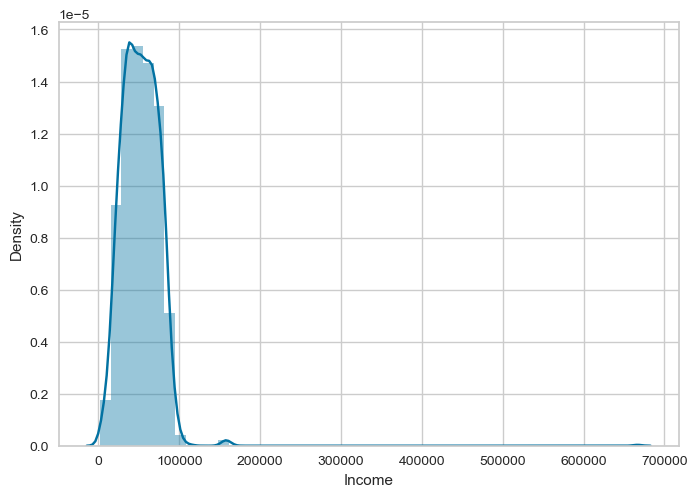

In [10]:
# income column 
sns.distplot(df["Income"])

In [11]:
# removing outlier in this column
q = df["Income"].quantile(0.99)
df = df[df["Income"]<q]
df.describe(include = "all")

ID   Year_Birth   Education Marital_Status        Income  \
count    2217.000000  2217.000000        2217           2217   2217.000000   
unique           NaN          NaN           5              8           NaN   
top              NaN          NaN  Graduation        Married           NaN   
freq             NaN          NaN        1116            858           NaN   
mean     5589.499323  1968.773117         NaN            NaN  51318.212464   
std      3247.883334    11.973287         NaN            NaN  20290.206717   
min         0.000000  1893.000000         NaN            NaN   1730.000000   
25%      2826.000000  1959.000000         NaN            NaN  35322.000000   
50%      5462.000000  1970.000000         NaN            NaN  51390.000000   
75%      8427.000000  1977.000000         NaN            NaN  67546.000000   
max     11191.000000  1996.000000         NaN            NaN  94384.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2217.000000  2217.000000        2217  2217.000000  2217.000000  ...   
unique          NaN          NaN         662          NaN          NaN  ...   
top             NaN          NaN  31-08-2012          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.447452     0.509247         NaN    49.172305   302.215607  ...   
std        0.539140     0.544110         NaN    28.936771   334.967574  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    24.000000  ...   
50%        0.000000     0.000000         NaN    50.000000   173.000000  ...   
75%        1.000000     1.000000         NaN    74.000000   502.000000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         2217.000000   2217.000000   2217.000000   2217.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             5.350925      0.073072      0.071719      0.068110   
std              2.407961      0.260313      0.258080      0.251992   
min              0.000000      0.000000      0.000000      0.000000   
25%              4.000000      0.000000      0.000000      0.000000   
50%              6.000000      0.000000      0.000000      0.000000   
75%              7.000000      0.000000      0.000000      0.000000   
max             20.000000      1.000000      1.000000      1.000000   

        AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count    2217.000000   2217.000000  2217.000000         2217.0     2217.0   
unique           NaN           NaN          NaN            NaN        NaN   
top              NaN           NaN          NaN            NaN        NaN   
freq             NaN           NaN          NaN            NaN        NaN   
mean        0.061344      0.013081     0.009472            3.0       11.0   
std         0.240015      0.113646     0.096885            0.0        0.0   
min         0.000000      0.000000     0.000000            3.0       11.0   
25%         0.000000      0.000000     0.000000            3.0       11.0   
50%         0.000000      0.000000     0.000000            3.0       11.0   
75%         0.000000      0.000000     0.000000            3.0       11.0   
max         1.000000      1.000000     1.000000            3.0       11.0   

           Response  
count   2217.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.146143  
std        0.353330  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[11 rows x 29 columns]

<Axes: xlabel='Income', ylabel='Density'>

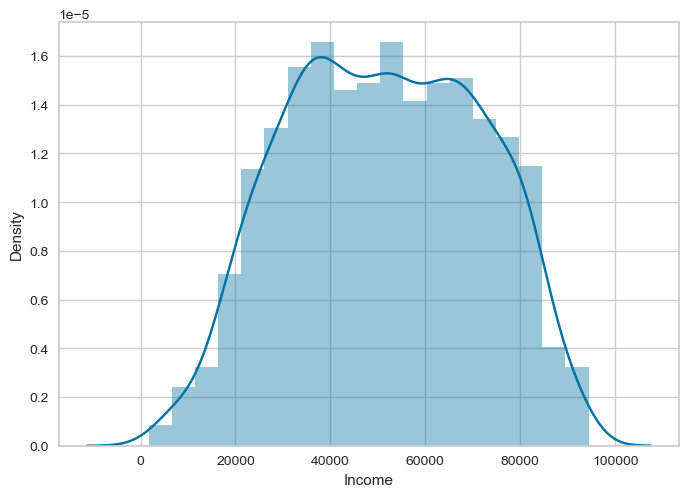

In [12]:
# Conforming the outcome
sns.distplot(df["Income"])

<Axes: xlabel='Kidhome', ylabel='Density'>

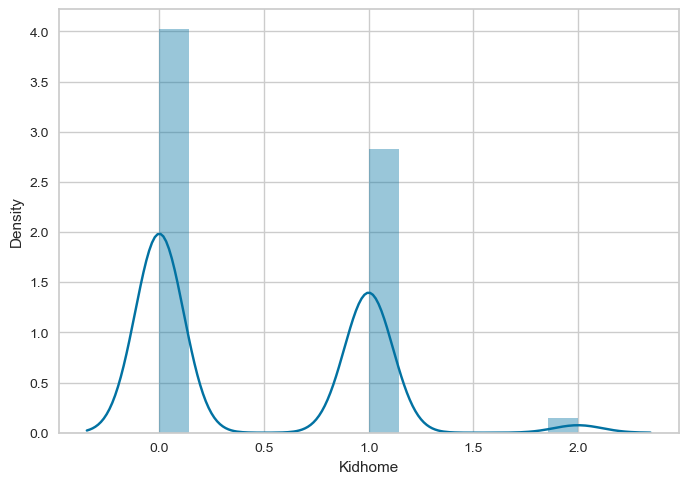

In [13]:
sns.distplot(df["Kidhome"])


<Axes: xlabel='Teenhome', ylabel='Density'>

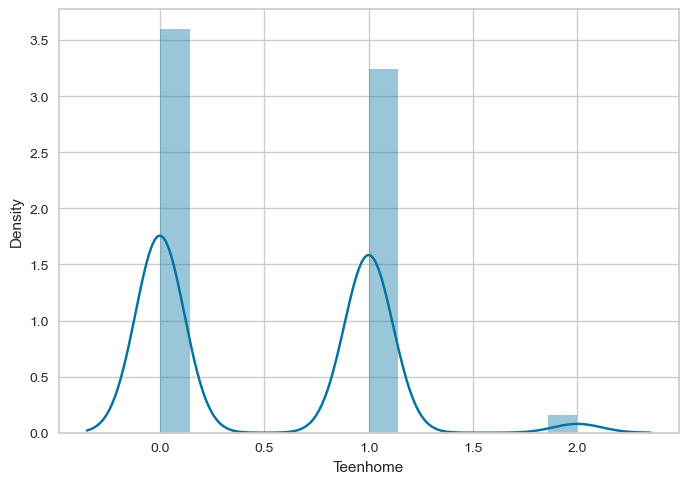

In [14]:
sns.distplot(df["Teenhome"])

In [15]:
# creating a new column -  teenhome+kidhome
df['Children'] = df['Kidhome'] + df['Teenhome']
df.head(2)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   

   Z_Revenue  Response  Children  
0         11         1         0  
1         11         0         2  

[2 rows x 30 columns]

<Axes: xlabel='Recency', ylabel='Density'>

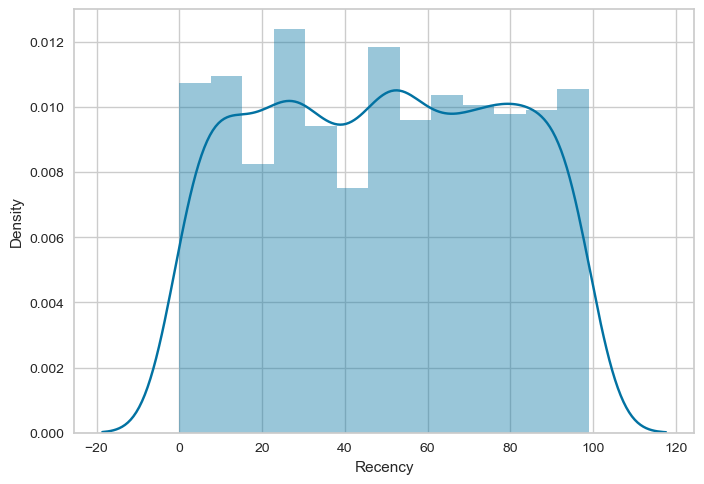

In [16]:
sns.distplot(df["Recency"])

<Axes: xlabel='MntWines', ylabel='Density'>

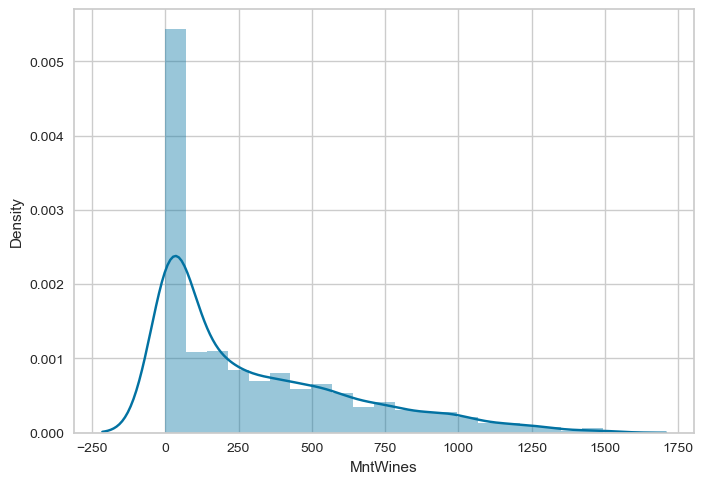

In [17]:
sns.distplot(df["MntWines"])

<Axes: xlabel='MntFruits', ylabel='Density'>

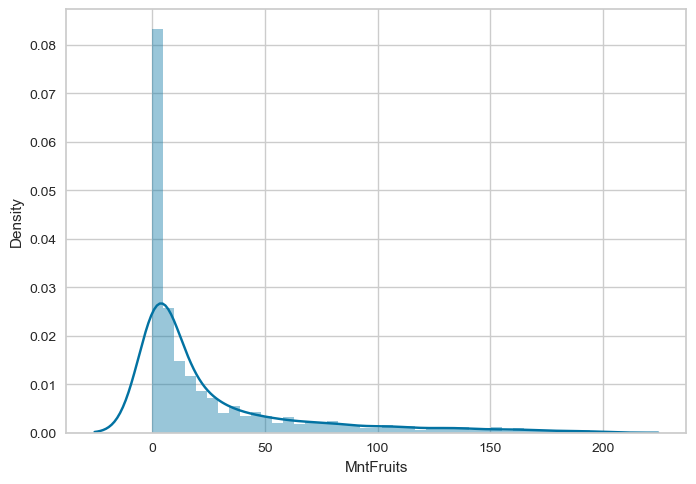

In [18]:
sns.distplot(df["MntFruits"])

<Axes: xlabel='MntMeatProducts', ylabel='Density'>

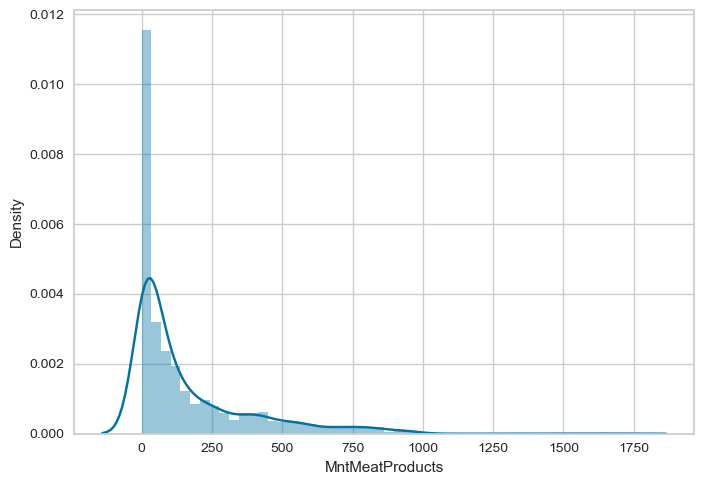

In [19]:
sns.distplot(df["MntMeatProducts"])

<Axes: xlabel='MntFishProducts', ylabel='Density'>

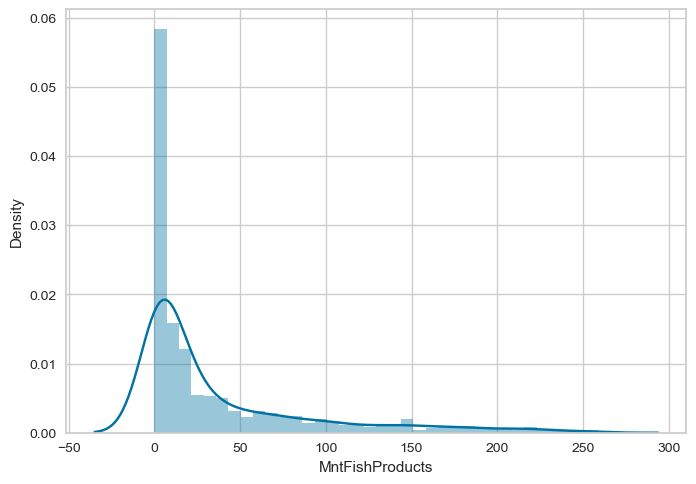

In [20]:
sns.distplot(df["MntFishProducts"])

<Axes: xlabel='MntSweetProducts', ylabel='Density'>

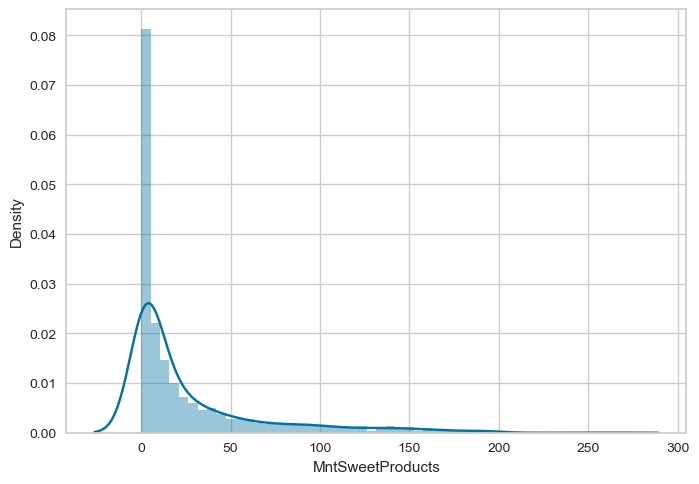

In [21]:
sns.distplot(df["MntSweetProducts"])

<Axes: xlabel='MntGoldProds', ylabel='Density'>

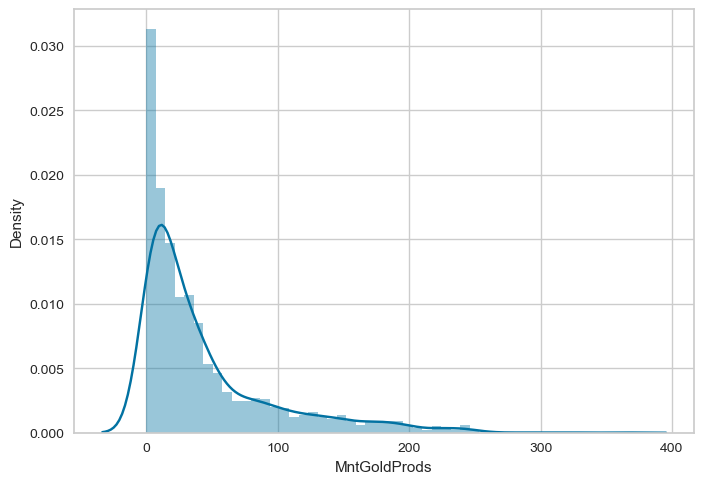

In [22]:
sns.distplot(df["MntGoldProds"])

<Axes: xlabel='NumDealsPurchases', ylabel='Density'>

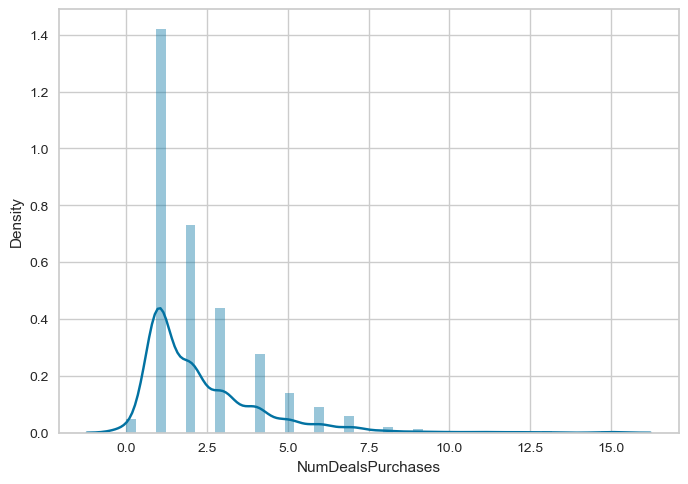

In [23]:
sns.distplot(df["NumDealsPurchases"])

<Axes: xlabel='NumCatalogPurchases', ylabel='Density'>

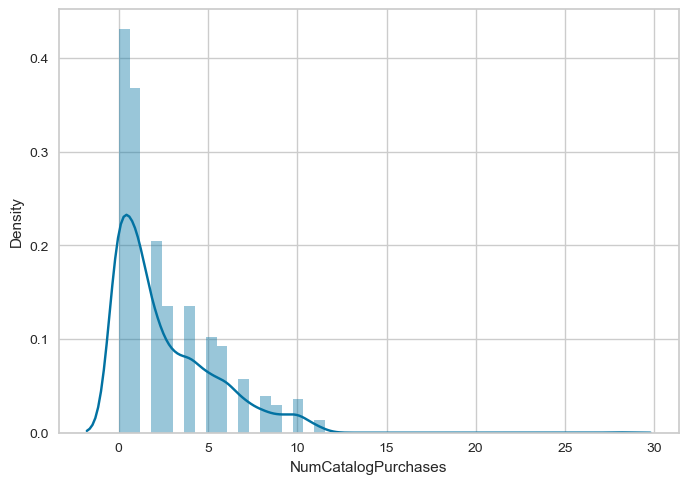

In [24]:
sns.distplot(df["NumCatalogPurchases"])

<Axes: xlabel='NumStorePurchases', ylabel='Density'>

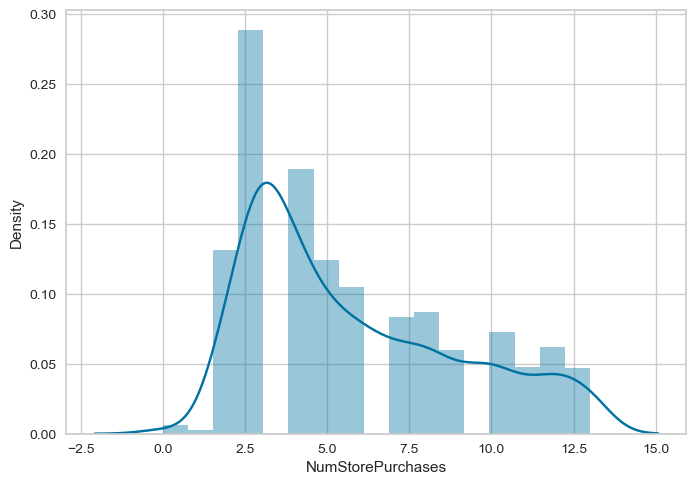

In [25]:
sns.distplot(df["NumStorePurchases"])

<Axes: xlabel='NumWebVisitsMonth', ylabel='Density'>

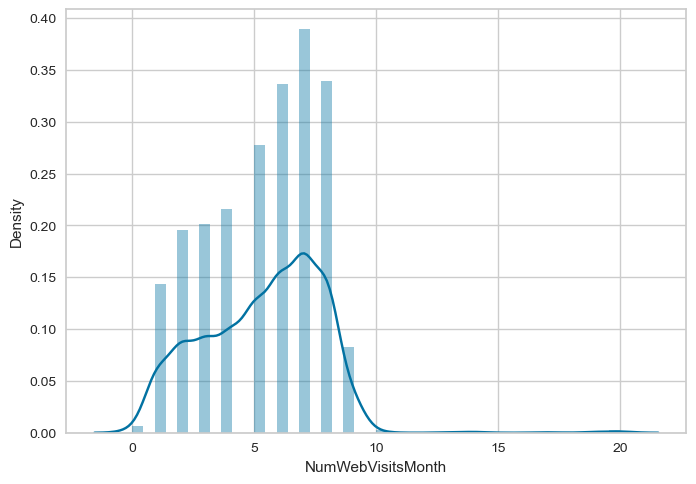

In [26]:
sns.distplot(df["NumWebVisitsMonth"])

## categorial columns

In [27]:
#Education column
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [28]:
# changing the names in this column
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})
     

In [29]:
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [30]:
#marital status column
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [31]:
# changing the names
status_mapping = {
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
# Replace the values in this column
df['Marital_Status'] = df['Marital_Status'].replace(status_mapping)

In [32]:
df["Marital_Status"].unique()

array(['Single', 'Partner'], dtype=object)

<Axes: xlabel='Year_Birth', ylabel='Density'>

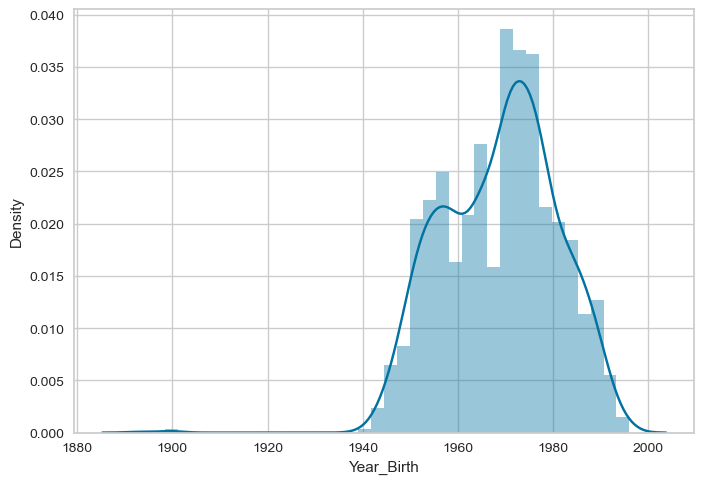

In [33]:
# Date column
sns.distplot(df["Year_Birth"])


<Axes: xlabel='Year_Birth', ylabel='Density'>

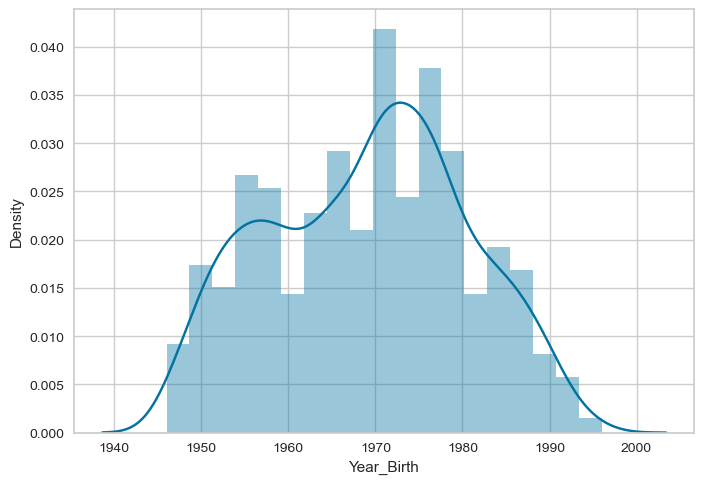

In [34]:
# removing outlier in this column
p = df["Year_Birth"].quantile(0.01)
df = df[df["Year_Birth"]>p]
sns.distplot(df["Year_Birth"])

In [35]:
# creating the age column
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [36]:
df.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate        Partner  71613.0        0         0   
3  6182        1984      Graduate        Partner  26646.0        1         0   
4  5324        1981  Postgraduate        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Children  Age  
0         0   67  
1         2   70  
2         0   59  
3         1   40  
4         1   43  

[5 rows x 31 columns]

In [37]:
#cretae total spent column
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head(3)     

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduate         Single  58138.0        0         0   
1  2174        1954  Graduate         Single  46344.0        1         1   
2  4141        1965  Graduate        Partner  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Children  Age  \
0             0         0              3         11         1         0   67   
1             0         0              3         11         0         2   70   
2             0         0              3         11         0         0   59   

   Total_Spent  
0         1617  
1           27  
2          776  

[3 rows x 32 columns]

In [38]:
# dropping unnecessary columns
columns_dropped = [ 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(columns_dropped, axis=1)
     

## EDA

In [39]:
#income by level of education
grouped_income_and_Education = df.groupby('Education').sum()[['Income']]
pd.options.display.float_format = '{:,.0f}'.format
print(grouped_income_and_Education)

                  Income
Education               
Graduate      57,309,566
Postgraduate  44,211,039
Undergraduate 10,586,549


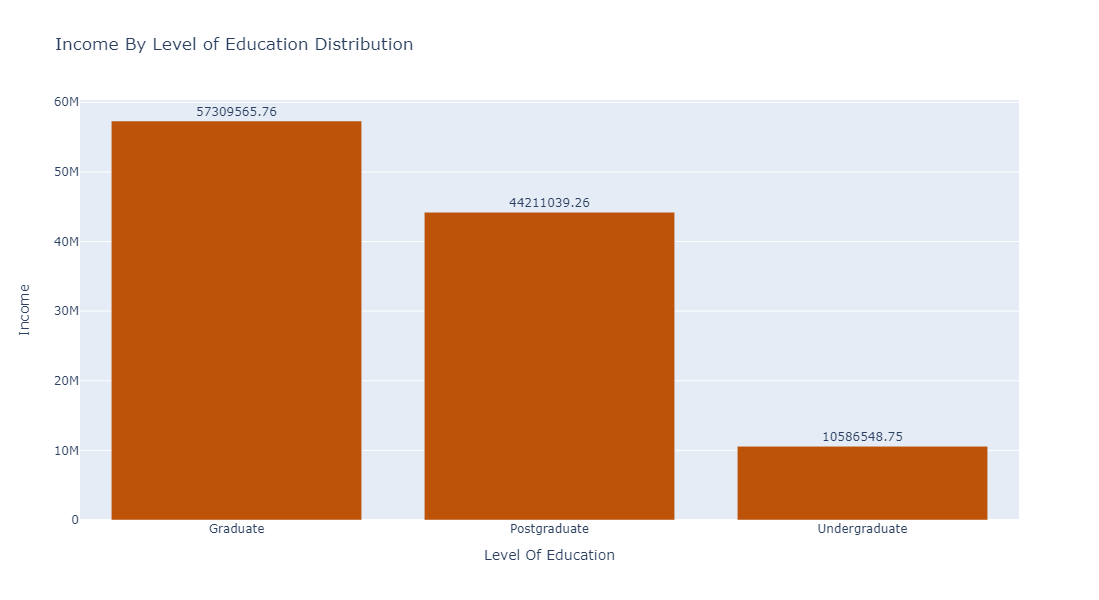

In [40]:
# visualizing this
grouped_income_and_Education = df.groupby('Education')['Income'].sum().reset_index(name='Total_Income')

# Create a bar graph
fig = px.bar(grouped_income_and_Education,
    x="Education",
    y="Total_Income",
    color_discrete_sequence=colors,  
    title="Income By Level of Education Distribution",
    text="Total_Income" 
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Level Of Education", 
    yaxis_title="Income",
    width=800,  
    height=600  
)
fig.show()

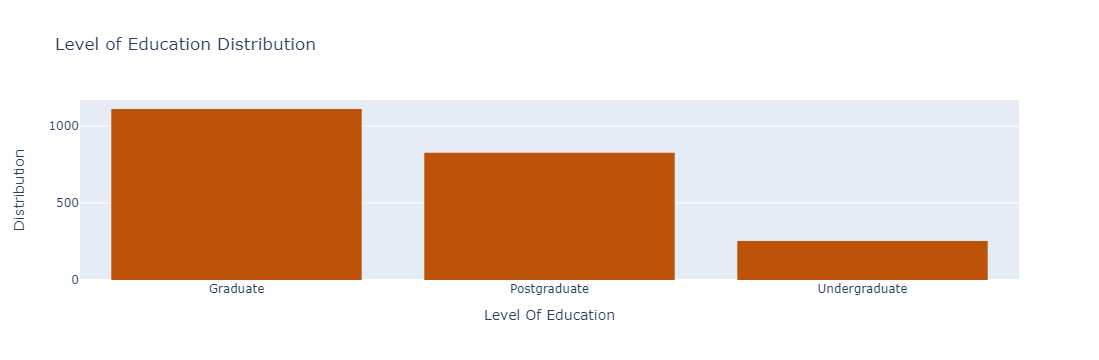

In [41]:
# number of customers in each education level
import plotly_express as px 
fig = px.histogram(
    df,
    x="Education",
    color_discrete_sequence=colors,
    title="Level of Education Distribution"
)
fig.update_layout(
    xaxis_title="Level Of Education", 
    yaxis_title="Distribution"  
)
fig.show()

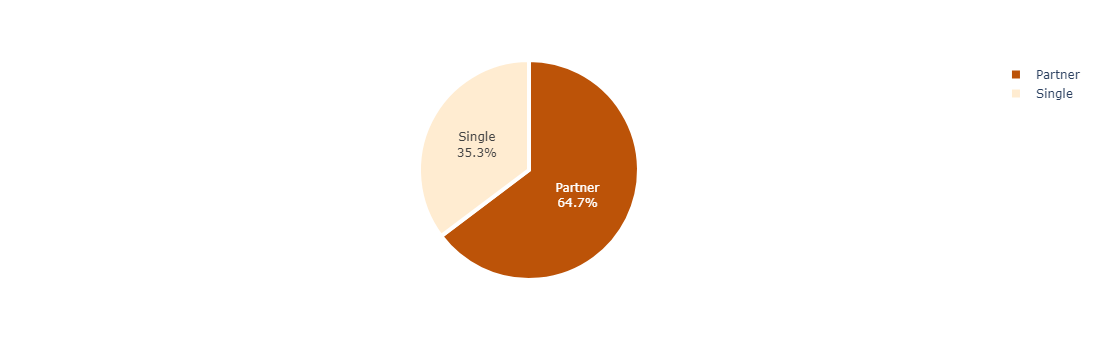

In [42]:
# Marital status
maritalstatus = df.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show()

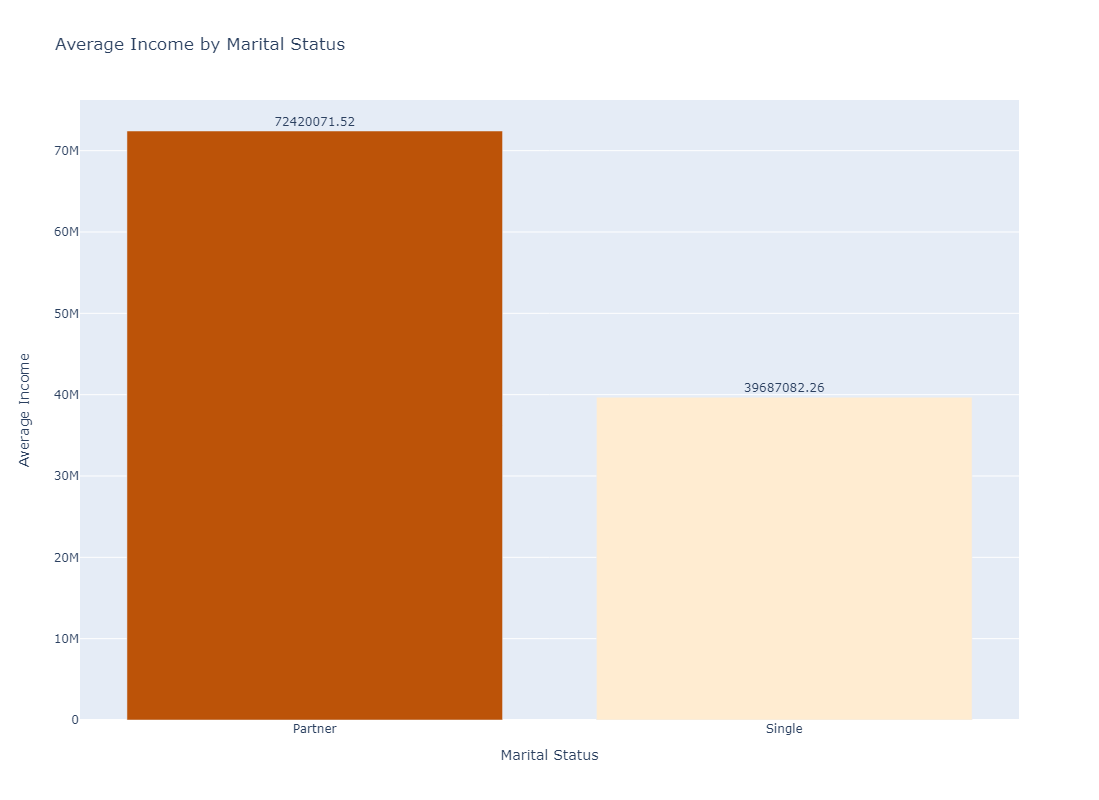

In [43]:
# marital status and  income
average_income = df.groupby('Marital_Status')['Income'].sum().reset_index(name='Average_Income')

# Create a bar graph
fig = px.bar(average_income, 
             x='Marital_Status', 
             y='Average_Income', 
             title='Average Income by Marital Status',
             color='Marital_Status',
             color_discrete_sequence=colors,
             labels={'Marital_Status': 'Marital Status', 'Average_Income': 'Average Income'},
             text='Average_Income')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Average Income',
    showlegend=False,
    width=600,  # Set the width of the figure
    height=800
)
fig.show()


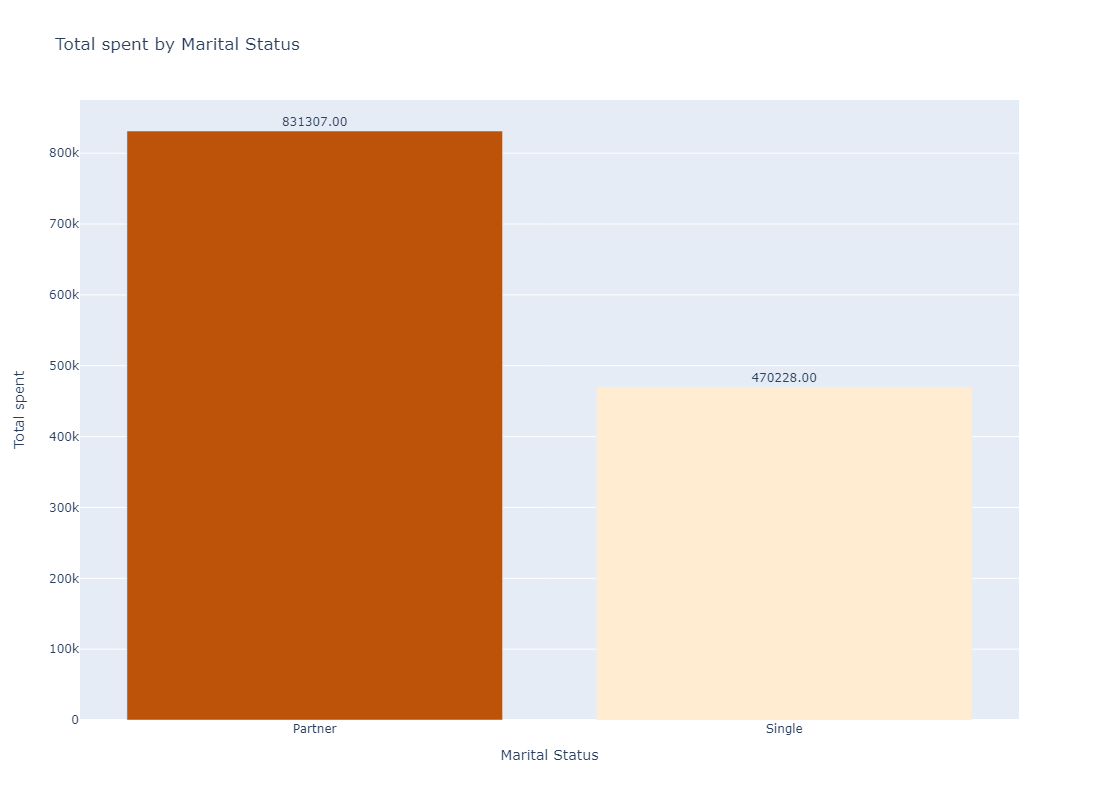

In [44]:
# marital status and Total spent  bar graph
total_income  = df.groupby('Marital_Status')['Total_Spent'].sum().reset_index(name='Total_Spent')
fig = px.bar(total_income, 
             x='Marital_Status', 
             y='Total_Spent', 
             title='Total spent by Marital Status',
             color='Marital_Status',
             color_discrete_sequence=colors,
             labels={'Marital_Status': 'Marital Status', 'Total_Spent': 'Total spent'},
             text='Total_Spent')
# Update the traces
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Update the layout
fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Total spent',
    showlegend=False,
    width=600, 
    height=800
)
fig.show()

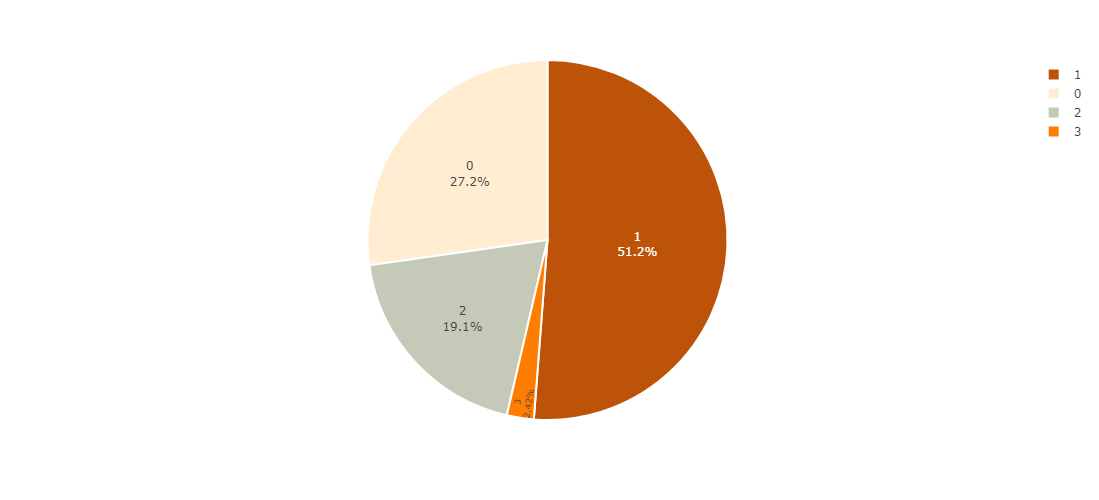

In [45]:
children = df.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.update_layout(
    width=600,  
    height=500)
fig.show()

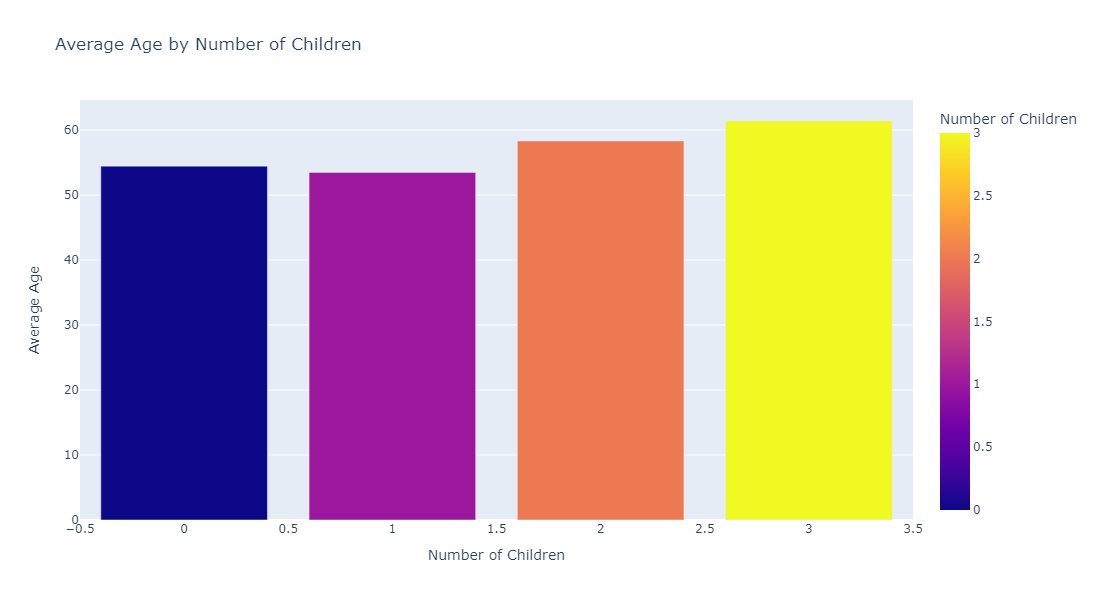

In [46]:
# relationship between age and number of children
grouped_children_age = df.groupby('Children')['Age'].mean().reset_index(name='Average_Age')

# Create a bar graph
fig = px.bar(grouped_children_age,
    x="Children",
    y="Average_Age",
    title="Average Age by Number of Children",
    color='Children',
    color_discrete_sequence=colors,
    labels={'Children': 'Number of Children', 'Average_Age': 'Average Age'}
)
fig.update_layout(
    xaxis_title="Number of Children", 
    yaxis_title="Average Age",
    width=800,  
    height=600  
)
fig.show()

In [47]:
df["Children"].unique()

array([0, 2, 1, 3], dtype=int64)

In [48]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Children', 'Age', 'Total_Spent'],
      dtype='object')

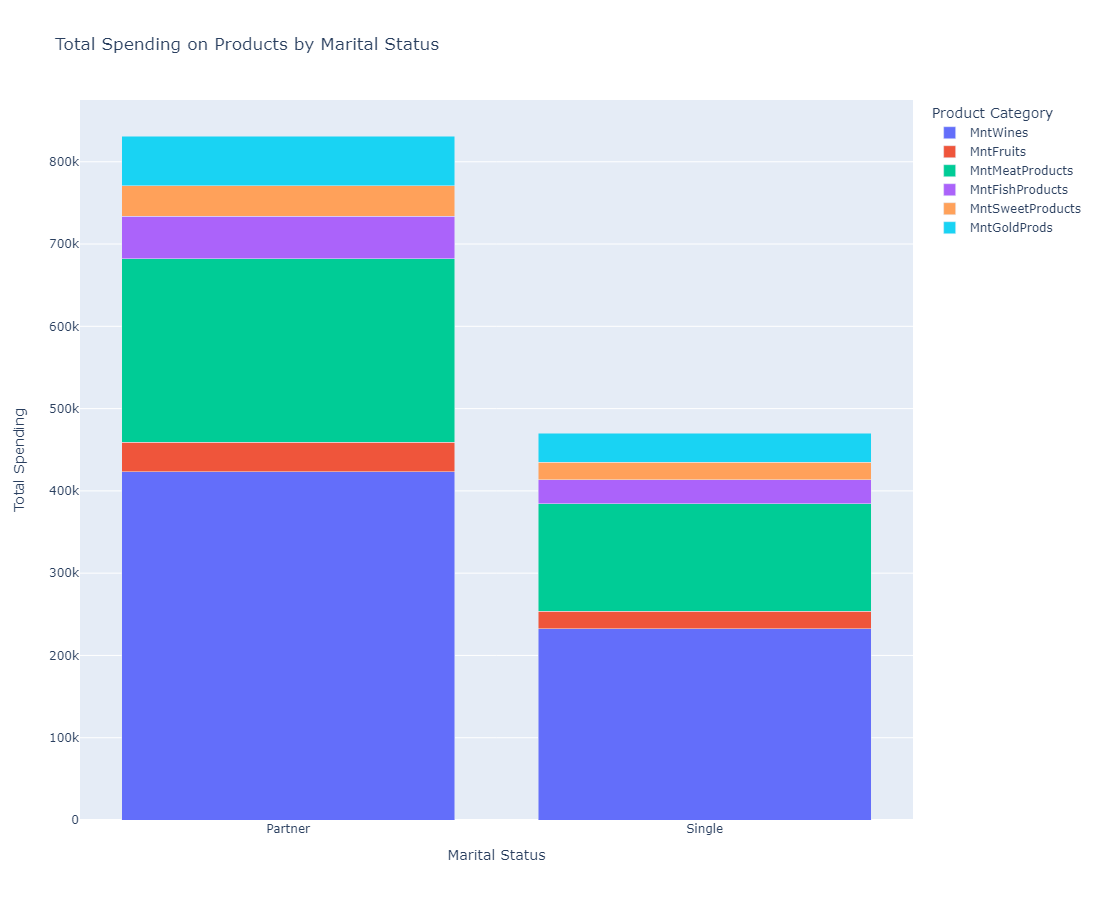

In [49]:
# Total Spending on Products by Marital Status
total_spending = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()
total_spending = pd.melt(total_spending, 
                         id_vars=['Marital_Status'], 
                         value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 
                                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                         var_name='Product_Category', 
                         value_name='Total_Spending')
fig = px.bar(total_spending, 
             x='Marital_Status', 
             y='Total_Spending', 
             color='Product_Category',
             title='Total Spending on Products by Marital Status',
             labels={'Marital_Status': 'Marital Status', 'Total_Spending': 'Total Spending', 'Product_Category': 'Product Category'},
             barmode='stack' 
            )
fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Total Spending',
    width=800,  
    height=900  
)
fig.show()

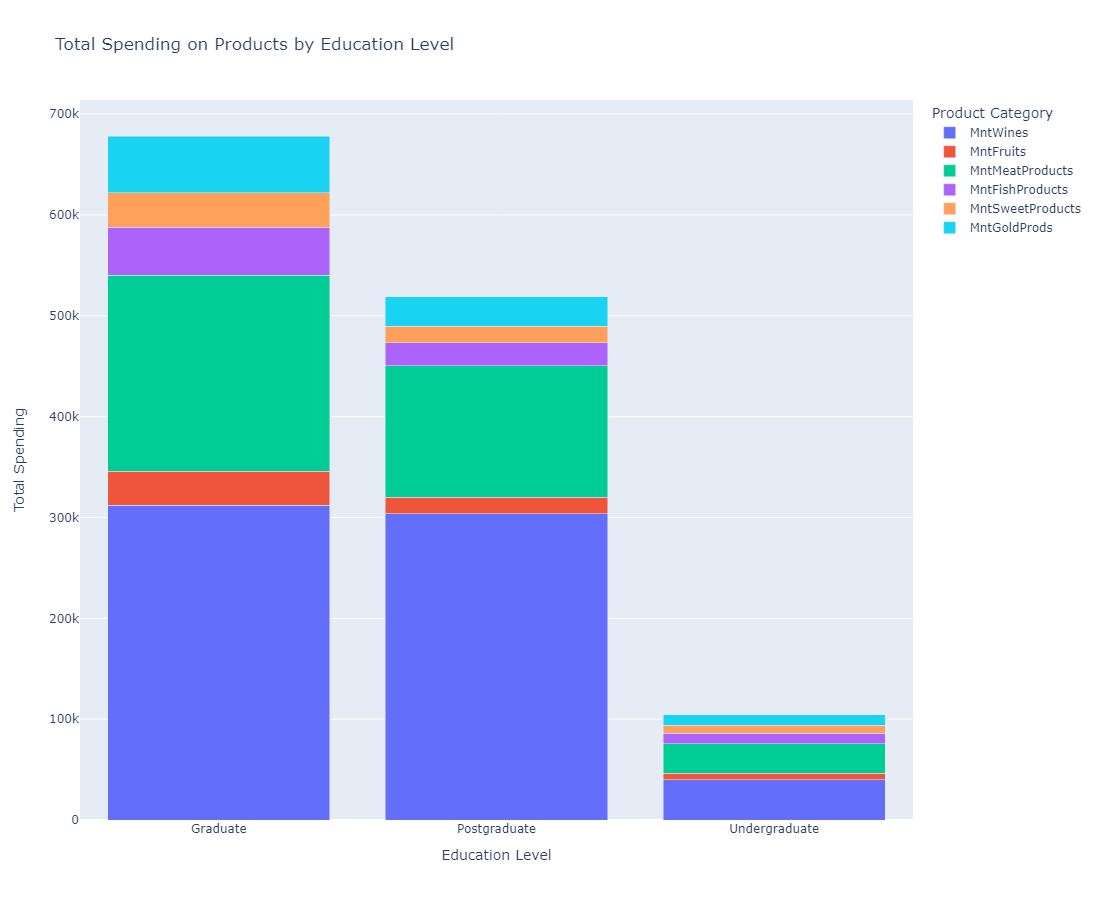

In [50]:
#'Total Spending on Products by Education Level
total_spending = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()
total_spending = pd.melt(total_spending, id_vars=['Education'], 
                         value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 
                                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                         var_name='Product_Category', value_name='Total_Spending')
fig = px.bar(total_spending, 
             x='Education', 
             y='Total_Spending', 
             color='Product_Category',
             title='Total Spending on Products by Education Level',
             labels={'Education': 'Education Level', 'Total_Spending': 'Total Spending', 'Product_Category': 'Product Category'},
             barmode='stack' 
            )
fig.update_layout(
    xaxis_title='Education Level',
    yaxis_title='Total Spending',
    width=800,  
    height=900  
)
fig.show()

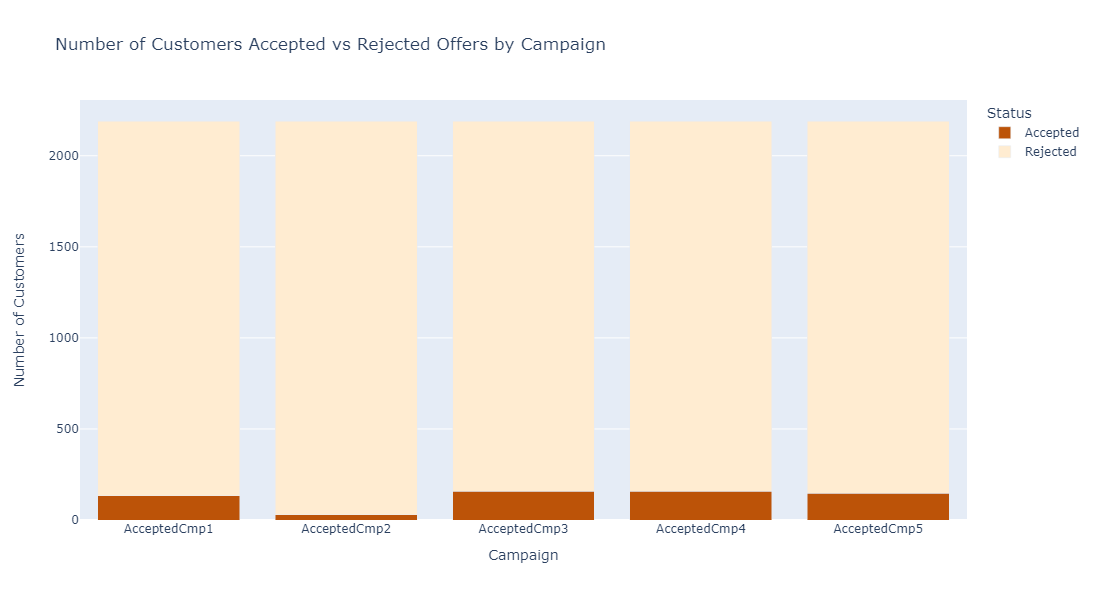

In [51]:
#Number of customers who accepted or rejected different campaingns 
accepted_counts = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
rejected_counts = len(df) - accepted_counts  

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Campaign': accepted_counts.index,
    'Accepted': accepted_counts.values,
    'Rejected': rejected_counts.values
})

# Melt the data for plotting as a stacked bar graph
data = pd.melt(data, id_vars='Campaign', 
               value_vars=['Accepted', 'Rejected'], 
               var_name='Status', value_name='Count')

fig = px.bar(data,
             x='Campaign',
             y='Count',
             color='Status',
             barmode='stack',  
             title='Number of Customers Accepted vs Rejected Offers by Campaign',
             labels={'Campaign': 'Campaign', 'Count': 'Number of Customers', 'Status': 'Status'},
             color_discrete_sequence=colors
            )

# Update the layout
fig.update_layout(
    xaxis_title='Campaign',
    yaxis_title='Number of Customers',
    width=900,  
    height=600  
)
fig.show()

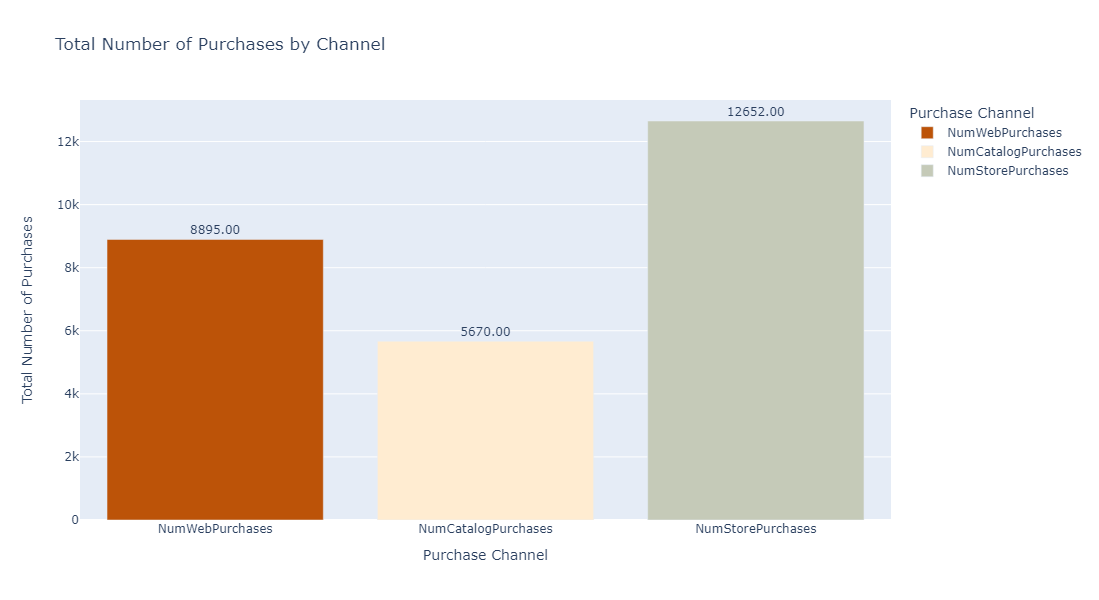

In [52]:
#Purchases by channel
sum_purchases = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

data = pd.DataFrame({
    'Channel': sum_purchases.index,
    'Total Purchases': sum_purchases.values
})

fig = px.bar(data,
             x='Channel',
             y='Total Purchases',
             title='Total Number of Purchases by Channel',
             labels={'Channel': 'Purchase Channel', 'Total Purchases': 'Total Number of Purchases'},
             color='Channel',  
             color_discrete_sequence=colors,
            text='Total Purchases')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
                       
fig.update_layout(
    xaxis_title='Purchase Channel',
    yaxis_title='Total Number of Purchases',
    width=900,  
    height=600  
)
fig.show()

In [53]:
df["NumWebVisitsMonth"].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

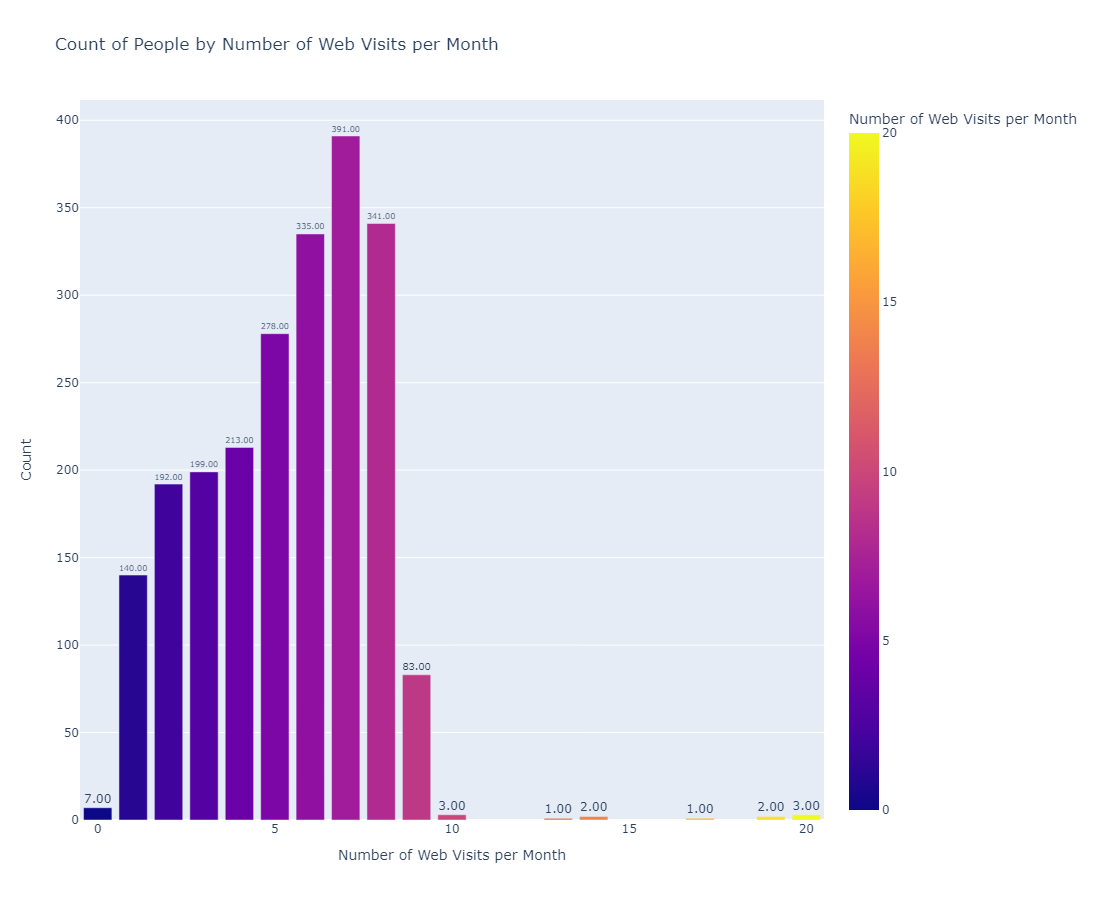

In [54]:
# number of web visits per month
specified_visits = [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19, 17, 13]
filtered_df = df[df['NumWebVisitsMonth'].isin(specified_visits)]
visit_counts = filtered_df['NumWebVisitsMonth'].value_counts().reindex(specified_visits, fill_value=0).reset_index()
visit_counts.columns = ['NumWebVisitsMonth', 'Count']
fig = px.bar(visit_counts,
             x='NumWebVisitsMonth',
             y='Count',
             title='Count of People by Number of Web Visits per Month',
             labels={'NumWebVisitsMonth': 'Number of Web Visits per Month', 'Count': 'Count'},
             color='NumWebVisitsMonth',  
             color_discrete_sequence=colors,
             text = "Count"
            )
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Number of Web Visits per Month',
    yaxis_title='Count',
    width=900,  
    height=900  
)
fig.show()

In [55]:
# Table of the above visulaization
max_visits = df['NumWebVisitsMonth'].max()
visit_range = range(0, max_visits + 1)

crosstab_table = pd.crosstab(index=df['NumWebVisitsMonth'], columns='Count')
crosstab_table = crosstab_table.reindex(visit_range, fill_value=0)
print(crosstab_table)

col_0              Count
NumWebVisitsMonth       
0                      7
1                    140
2                    192
3                    199
4                    213
5                    278
6                    335
7                    391
8                    341
9                     83
10                     3
11                     0
12                     0
13                     1
14                     2
15                     0
16                     0
17                     1
18                     0
19                     2
20                     3


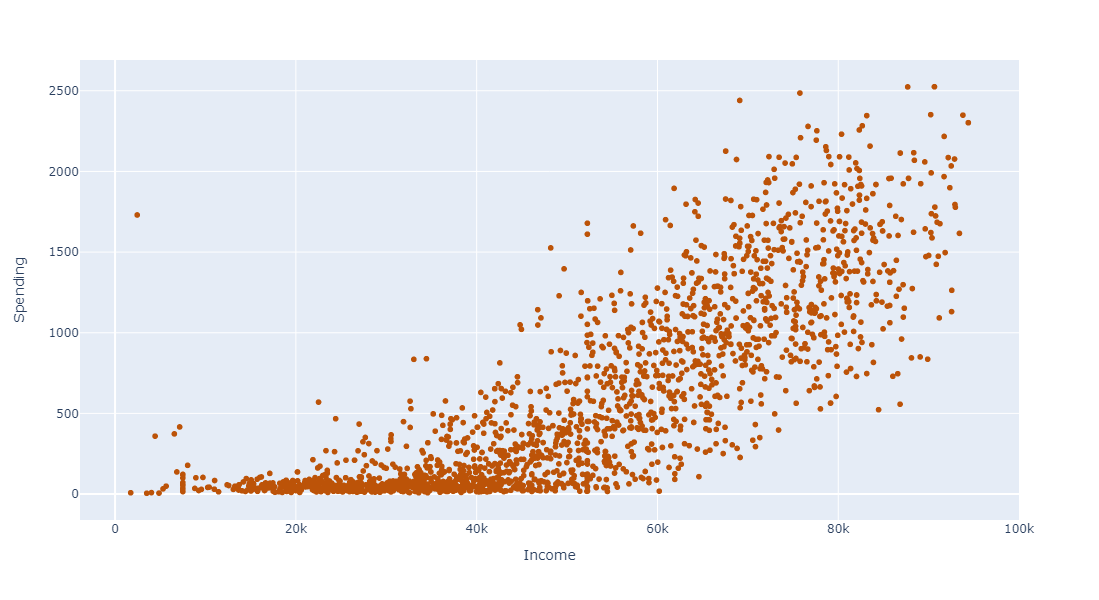

In [56]:
# income vs Expenditure
fig = px.scatter(x = df.Income,
                y= df.Total_Spent,
                color_discrete_sequence=colors,
                )
# Update the layout
fig.update_layout(
    xaxis_title='Income',
    yaxis_title='Spending',
    width=900,  
    height=600 
)
fig.show()

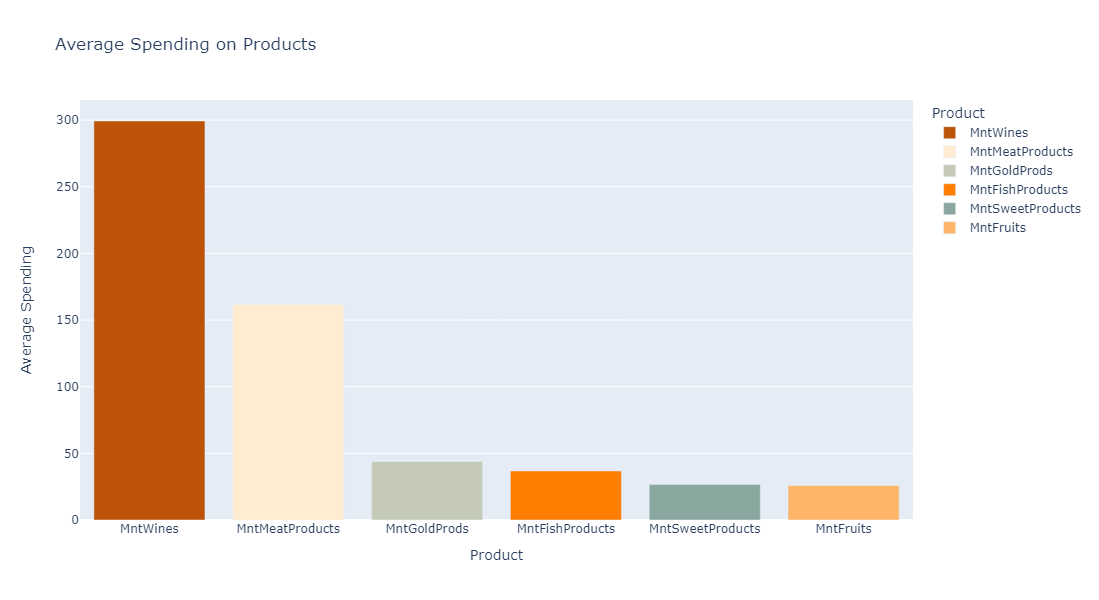

In [57]:
# where people are spending their cash more
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])
fig = px.bar(
    product_means_df,
    x='Product',
    y='Average Spending',
    title='Average Spending on Products',
    labels={'Product': 'Product', 'Average Spending': 'Average Spending'},
    color='Product',  
    color_discrete_sequence=colors
)

fig.update_layout(
    xaxis_title='Product',
    yaxis_title='Average Spending',
    width=900,  
    height=600 
)
fig.show()

In [58]:
df1 = df.copy()

In [59]:
df1.describe()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2,191    2,191     2,191    2,191     2,191      2,191   
mean   51,167        0         1       49       299         26   
std    20,307        1         1       29       334         39   
min     1,730        0         0        0         0          0   
25%    34,976        0         0       24        23          1   
50%    51,250        0         0       49       172          8   
75%    67,458        1         1       74       493         32   
max    94,384        2         2       99     1,493        199   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
count            2,191            2,191             2,191         2,191  ...   
mean               162               37                27            44  ...   
std                217               54                41            52  ...   
min                  0                0                 0             0  ...   
25%                 15                3                 1             9  ...   
50%                 65               12                 8            24  ...   
75%                223               48                32            56  ...   
max              1,725              259               263           362  ...   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count         2,191         2,191         2,191         2,191         2,191   
mean              0             0             0             0             0   
std               0             0             0             0             0   
min               0             0             0             0             0   
25%               0             0             0             0             0   
50%               0             0             0             0             0   
75%               0             0             0             0             0   
max               1             1             1             1             1   

       Complain  Response  Children   Age  Total_Spent  
count     2,191     2,191     2,191 2,191        2,191  
mean          0         0         1    55          594  
std           0         0         1    11          595  
min           0         0         0    28            5  
25%           0         0         0    46           68  
50%           0         0         1    54          382  
75%           0         0         1    64        1,027  
max           1         1         3    78        2,525  

[8 rows x 25 columns]

In [60]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2191 non-null   object 
 1   Marital_Status       2191 non-null   object 
 2   Income               2191 non-null   float64
 3   Kidhome              2191 non-null   int64  
 4   Teenhome             2191 non-null   int64  
 5   Recency              2191 non-null   int64  
 6   MntWines             2191 non-null   int64  
 7   MntFruits            2191 non-null   int64  
 8   MntMeatProducts      2191 non-null   int64  
 9   MntFishProducts      2191 non-null   int64  
 10  MntSweetProducts     2191 non-null   int64  
 11  MntGoldProds         2191 non-null   int64  
 12  NumDealsPurchases    2191 non-null   int64  
 13  NumWebPurchases      2191 non-null   int64  
 14  NumCatalogPurchases  2191 non-null   int64  
 15  NumStorePurchases    2191 non-null   int64 

In [61]:
df2= df1.copy()

In [62]:
df["Marital_Status"].unique()

array(['Single', 'Partner'], dtype=object)

In [63]:
df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
df['Marital_Status'] = df['Marital_Status'].map({'Single':0,'Partner':1})
     

In [64]:
df2["Marital_Status"].unique()

array(['Single', 'Partner'], dtype=object)

In [65]:
df3 = df.copy()

## clustering

## PCA

In [66]:
#Feature Scaling
df1['Education'] = df1['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
df1['Marital_Status'] = df1['Marital_Status'].map({'Single':0,'Partner':1})
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(df1)

PCA(n_components=4)

In [68]:

df1['Income'] = df1['Income'].astype(int)

In [69]:
W = pca.components_.T
W
     

array([[-4.82211999e-06, -3.92337465e-05, -8.07881256e-04,
         2.21323732e-03],
       [ 1.49565062e-07, -2.16844190e-05, -8.24522225e-05,
         8.38630456e-05],
       [-9.99608331e-01, -2.79403173e-02, -1.38993540e-03,
         6.20286441e-04],
       [ 1.39244307e-05, -2.87337510e-04,  2.32024735e-06,
         7.94624401e-04],
       [-1.59907057e-06, -3.73050740e-04, -1.09177494e-03,
         8.59356105e-07],
       [-2.08859641e-05,  1.86979416e-03,  2.23264685e-03,
         4.10513894e-03],
       [-1.19916081e-02,  4.72590010e-01, -7.19616758e-01,
         3.34799147e-01],
       [-1.04358263e-03,  2.43684942e-02,  7.03061285e-02,
        -2.17902547e-01],
       [-7.40607794e-03,  2.47708097e-01,  6.46963648e-01,
         6.01755820e-01],
       [-1.46359846e-03,  3.67084413e-02,  1.07593140e-01,
        -3.76726060e-01],
       [-1.08646541e-03,  2.36130408e-02,  6.89942921e-02,
        -2.29165526e-01],
       [-1.06970523e-03,  3.79555252e-02,  2.90508800e-02,
      

In [70]:
df_w = pd.DataFrame(W, index=df1.columns, columns=['W1','W2','W3', 'W4']).round(4)
df_w = df_w.applymap(lambda x: f"{x:.4f}")
print(df_w)

                          W1       W2       W3       W4
Education            -0.0000  -0.0000  -0.0008   0.0022
Marital_Status        0.0000  -0.0000  -0.0001   0.0001
Income               -0.9996  -0.0279  -0.0014   0.0006
Kidhome               0.0000  -0.0003   0.0000   0.0008
Teenhome             -0.0000  -0.0004  -0.0011   0.0000
Recency              -0.0000   0.0019   0.0022   0.0041
MntWines             -0.0120   0.4726  -0.7196   0.3348
MntFruits            -0.0010   0.0244   0.0703  -0.2179
MntMeatProducts      -0.0074   0.2477   0.6470   0.6018
MntFishProducts      -0.0015   0.0367   0.1076  -0.3767
MntSweetProducts     -0.0011   0.0236   0.0690  -0.2292
MntGoldProds         -0.0011   0.0380   0.0291  -0.4288
NumDealsPurchases     0.0000   0.0003  -0.0022  -0.0012
NumWebPurchases      -0.0001   0.0017  -0.0029  -0.0067
NumCatalogPurchases  -0.0001   0.0025   0.0019  -0.0027
NumStorePurchases    -0.0001   0.0017  -0.0015  -0.0047
NumWebVisitsMonth     0.0001   0.0005  -0.0037  

In [71]:

pca.explained_variance_

array([4.12684659e+08, 1.60069670e+05, 3.02596308e+04, 4.88429047e+03])

In [72]:
df_w2 = pd.DataFrame(pca.explained_variance_ratio_, index=range(1,5), columns=['Explained Variability'])
df_w2 = df_w2.applymap(lambda x: f"{x:.4f}")
print(df_w2)

  Explained Variability
1                0.9995
2                0.0004
3                0.0001
4                0.0000


In [73]:
data_PCA = pd.DataFrame(pca.transform(df1), columns=(['col1', 'col2', 'col3','col4'])).round(4)

In [74]:

data_PCA.describe().T

count  mean    std     min     25%  50%    75%    max
col1  2,191     0 20,315 -43,256 -16,292  -87 16,200 49,437
col2  2,191     0    400  -1,070    -265  -43    236  2,561
col3  2,191     0    174    -684     -57    9     47  1,516
col4  2,191    -0     70    -380     -19   13     29    495

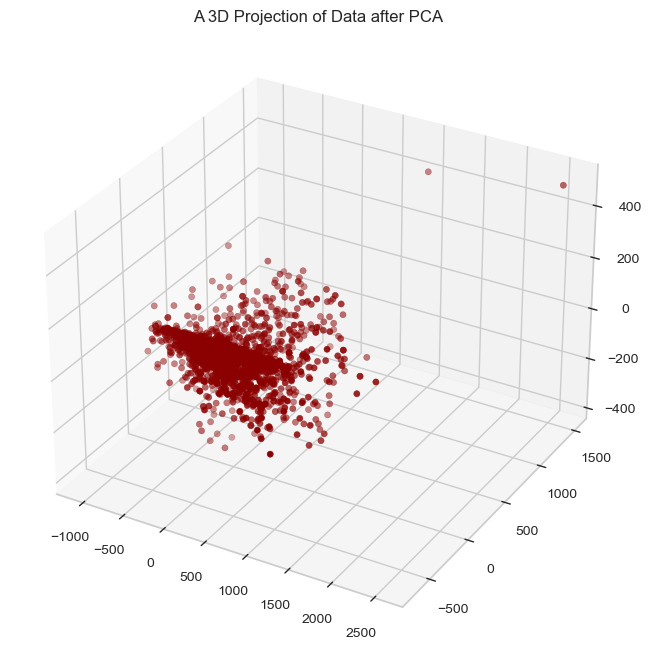

In [75]:
w = data_PCA['col1']
x = data_PCA['col2']
y = data_PCA['col3']
z = data_PCA['col4']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data after PCA')
plt.show()
     
     

## Determining the number of clusters using Elbow method

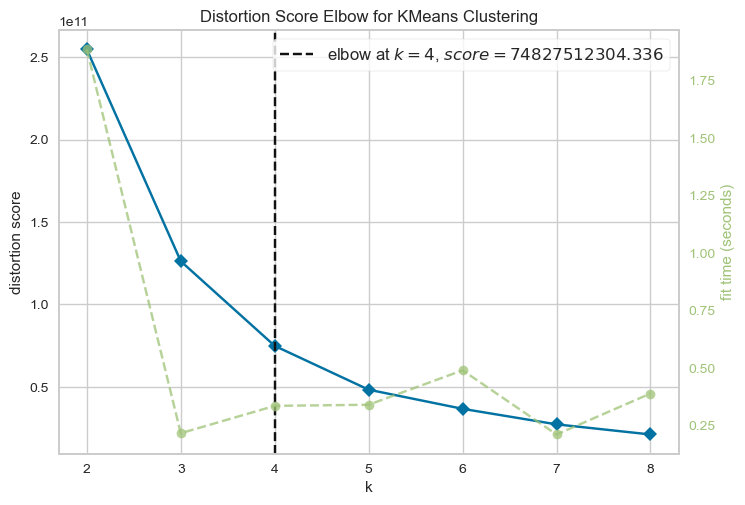

In [76]:
Elbow_M = KElbowVisualizer(KMeans(), k=8)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [77]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(data_PCA)


KMeans(n_clusters=4, random_state=42)

For n_clusters = 2, the average silhouette score is: 0.6049365355919537
For n_clusters = 3, the average silhouette score is: 0.5544250981141076
For n_clusters = 4, the average silhouette score is: 0.5392785422884144


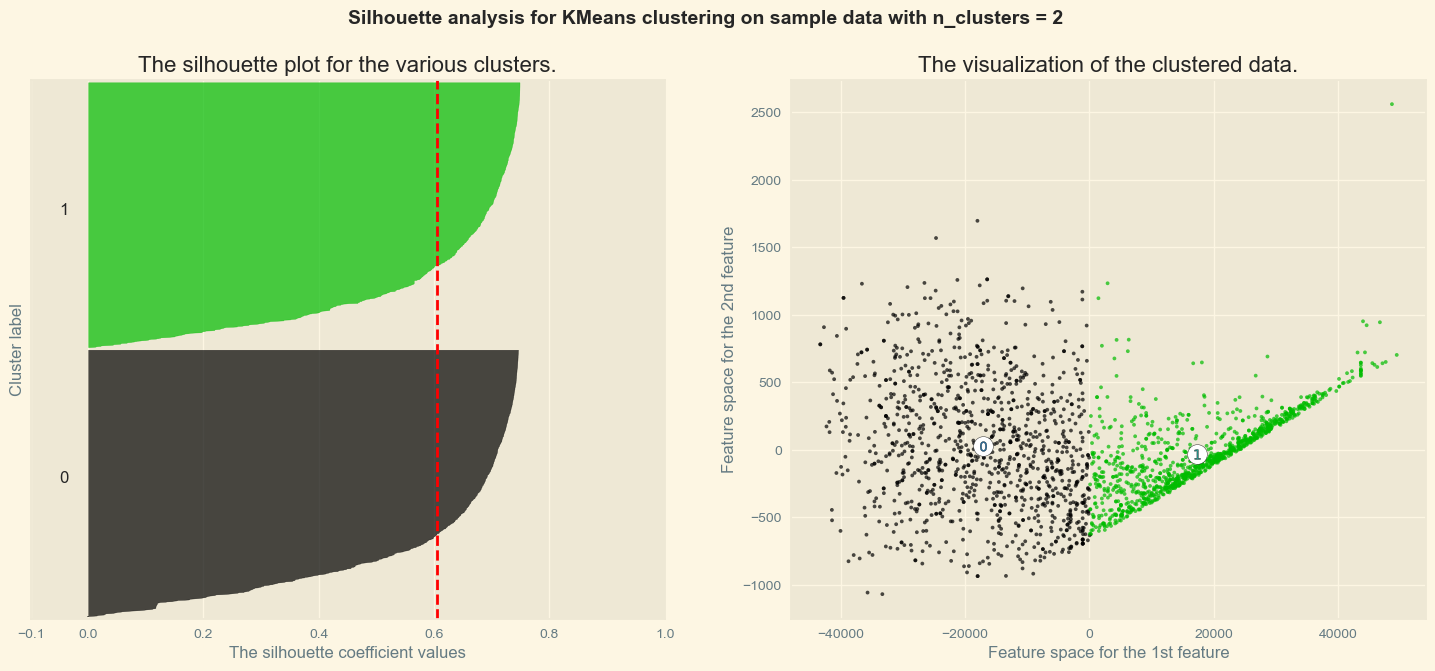

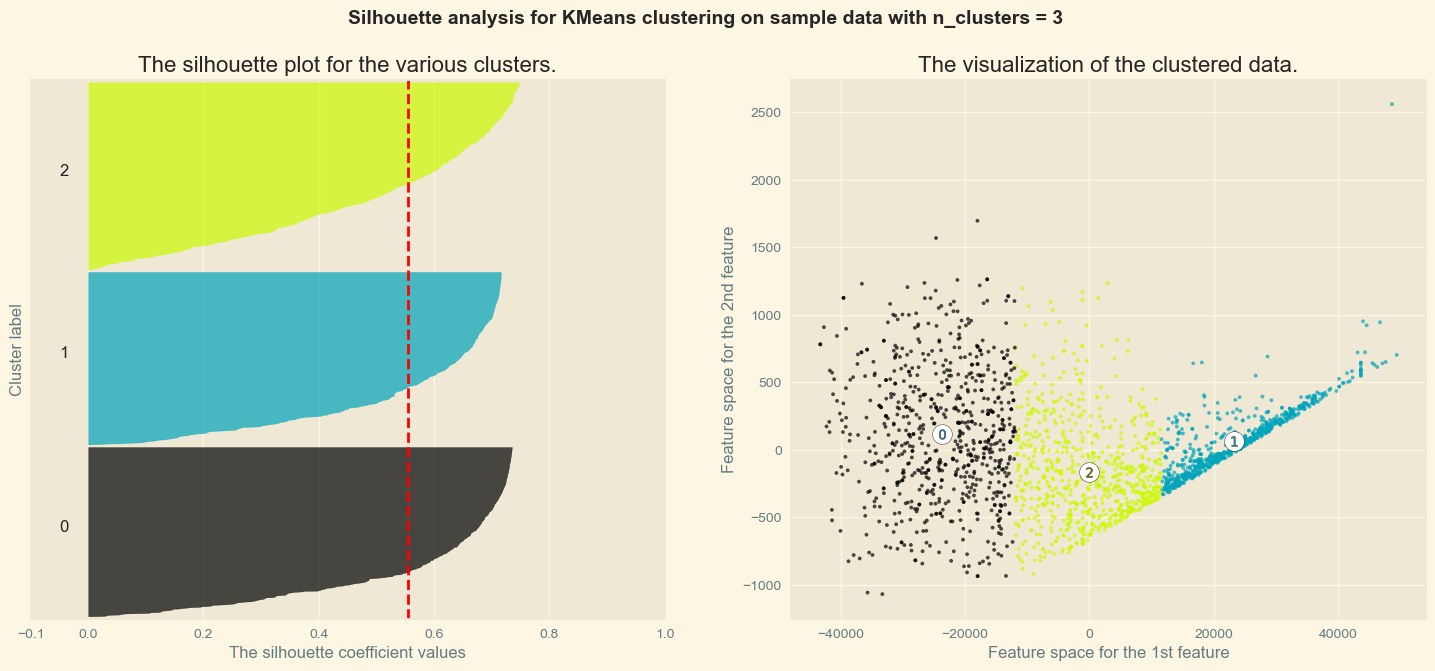

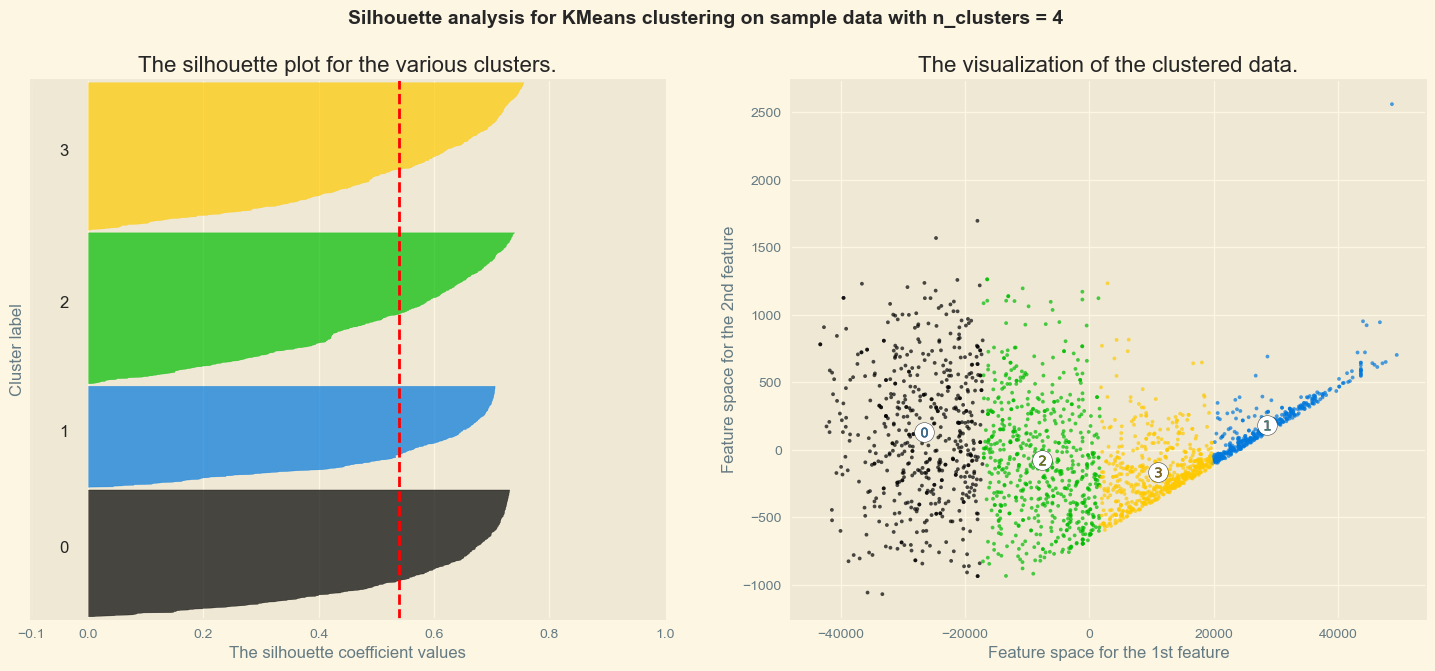

In [111]:
# validating the number of k
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
reduced_possible_k_values = range(2, 5)

for k in reduced_possible_k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_PCA) + (k + 1) * 10])

    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = model.fit_predict(data_PCA)
    silhouette_avg = silhouette_score(data_PCA, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(data_PCA, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(data_PCA.iloc[:, 0], data_PCA.iloc[:, 1], 
                marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white",
                alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f'Silhouette analysis for KMeans clustering on sample data with n_clusters = {k}', fontsize=14, fontweight="bold")

plt.show()

## Analyzing the results

In [78]:
pca_kmeans = pd.concat([df3.reset_index(drop = True), pd.DataFrame(data_PCA)], axis  = 1)
pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3','Component 4']
# adding the clustering labels
pca_kmeans["segment k-means PCA" ] = kmeans_pca.labels_

In [79]:
pca_kmeans.head(3)

Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0  58,138        0         0       58       635   
1          1               0  46,344        1         1       38        11   
2          1               1  71,613        0         0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Complain  Response  \
0         88              546              172  ...         0         1   
1          1                6                2  ...         0         0   
2         49              127              111  ...         0         0   

   Children  Age  Total_Spent  Component 1  Component 2  Component 3  \
0         0   67         1617       -7,000          931          230   
1         2   70           27        4,840         -522          -10   
2         0   59          776      -20,444         -364          -96   

   Component 4  segment k-means PCA  
0          -73                    2  
1           27                    3  
2          -54                    0  

[3 rows x 32 columns]

In [80]:
pca_kmeans["segment k-means PCA"].unique()

array([2, 3, 0, 1])

In [81]:
pca_kmeans["Segment"] = pca_kmeans["segment k-means PCA"].map({0:"First",
                                                              1:"Second",
                                                              2: "Third",
                                                              3: "Fourth"})

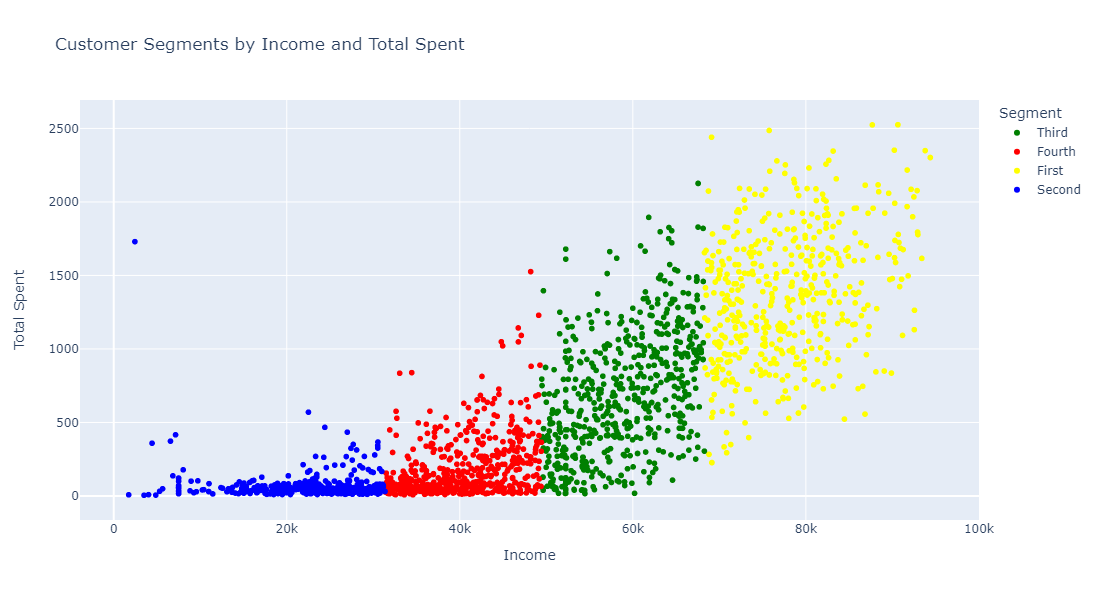

In [82]:
# Define the colors for the clusters
color_map = {0: 'yellow', 1: 'blue', 2: 'green', 3: 'red'}
pca_kmeans['Color'] = pca_kmeans['segment k-means PCA'].map(color_map)

# Plotting the scatter plot using Plotly Express
fig = px.scatter(pca_kmeans, x='Income', y='Total_Spent', color='Segment', 
                 color_discrete_map={'First': 'yellow', 'Second': 'blue', 'Third': 'green', 'Fourth': 'red'},
                 title='Customer Segments by Income and Total Spent',
                 labels={'Income': 'Income', 'Total_Spent': 'Total Spent'},
                width=900, height=600)

fig.show()

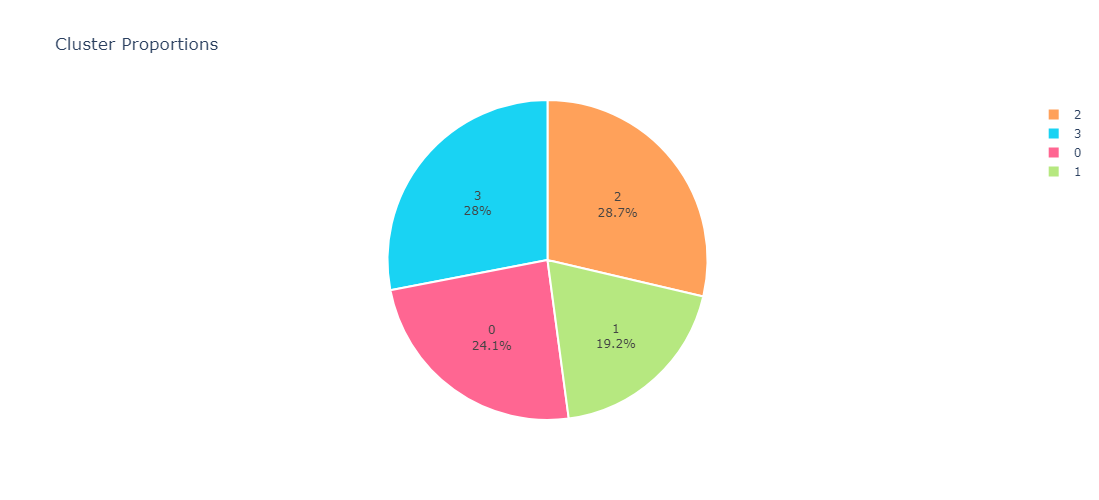

In [83]:
sg = pca_kmeans['segment k-means PCA'].value_counts()

color_mp = {0: 'yellow', 1: 'blue', 2: 'green', 3: 'red'}
fig = px.pie(sg, 
             values=sg.values, 
             names=sg.index.map(str),  
             color=sg.index.map(str).map(color_mp ),  
             color_discrete_map=color_mp ,  
             title='Cluster Proportions',
             labels={'label': 'Customers Cluster', 'value': 'Proportion'})


fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(line=dict(color='white', width=2)))
fig.update_layout(width=600, height=500)

fig.show()

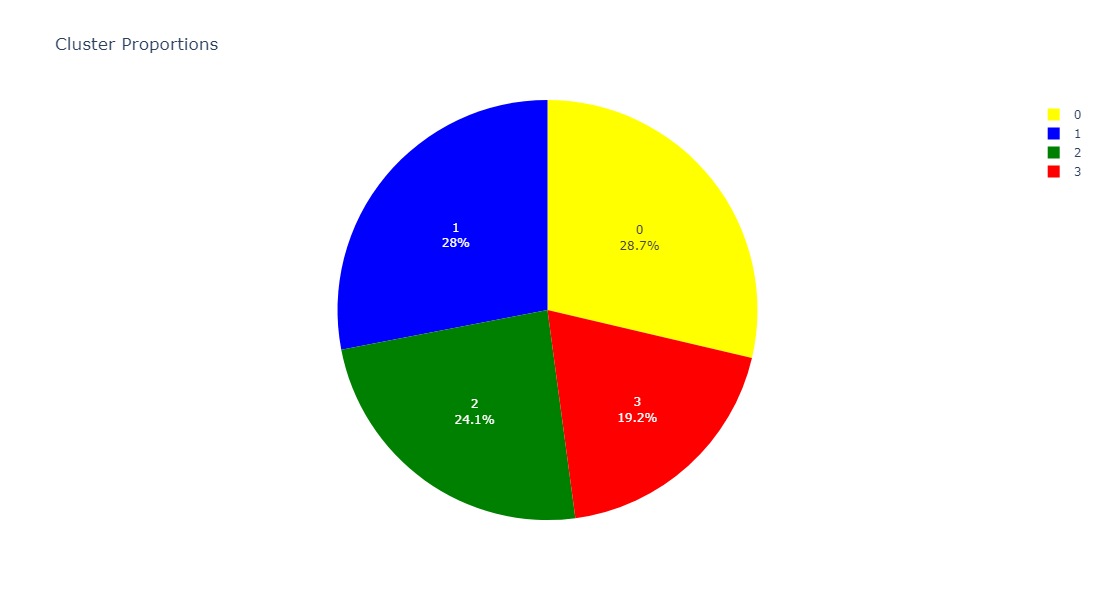

In [84]:
preds = kmeans_pca.predict(data_PCA)

# Create a DataFrame with cluster labels
clusters = pd.DataFrame({'Cluster': preds})

# Calculate cluster sizes
cluster_size = clusters['Cluster'].value_counts()

# Define colors for the clusters
colors = ['yellow', 'blue', 'green', 'red']

# Plotting the pie chart using Plotly Express
fig = px.pie(names=sorted(cluster_size.index), values=cluster_size.values,
             title='Cluster Proportions', 
             color=sorted(cluster_size.index), color_discrete_map={k: colors[k] for k in sorted(cluster_size.index)},
             labels={'labels': 'Customers Cluster', 'values': 'Proportion'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=600, height=600)

fig.show()

In [85]:
df1.head()

Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               0   58138        0         0       58       635   
1          1               0   46344        1         1       38        11   
2          1               1   71613        0         0       26       426   
3          1               1   26646        1         0       26        11   
4          2               1   58293        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0         88              546              172  ...             0   
1          1                6                2  ...             0   
2         49              127              111  ...             0   
3          4               20               10  ...             0   
4         43              118               46  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Children  Age  Total_Spent  
0         0   67         1617  
1         2   70           27  
2         0   59          776  
3         1   40           53  
4         1   43          422  

[5 rows x 27 columns]

## Analysis of Age and Total Spent

In [86]:
X = df[["Age", "Total_Spent"]]

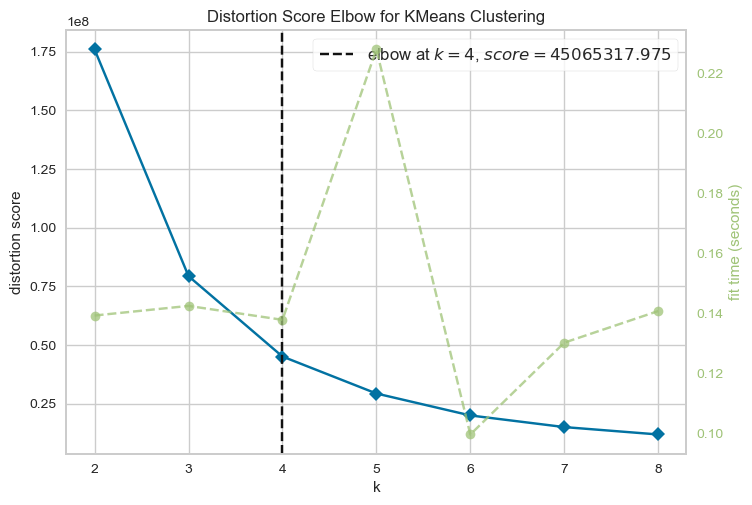

In [87]:
Elbow_M = KElbowVisualizer(KMeans(), k=8)
Elbow_M.fit(X)
Elbow_M.show();

In [88]:
kmeans2 = KMeans(n_clusters=4)  
kmeans2.fit(X)

KMeans(n_clusters=4)

In [89]:
print(kmeans2.cluster_centers_)

[[  54.60740741 1744.13703704]
 [  56.84669811  563.2004717 ]
 [  57.62131519 1104.80272109]
 [  52.98579545   99.05587121]]


In [90]:
print(kmeans2.labels_)

[0 3 1 ... 2 2 3]


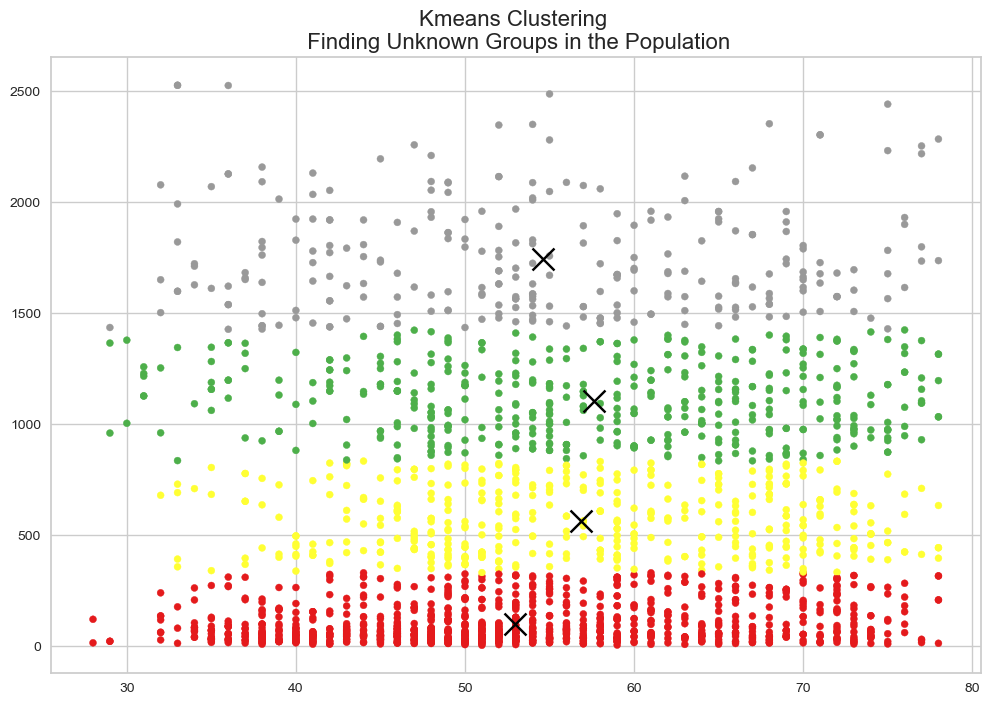

In [91]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans2.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans2.cluster_centers_[:,0] ,kmeans2.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

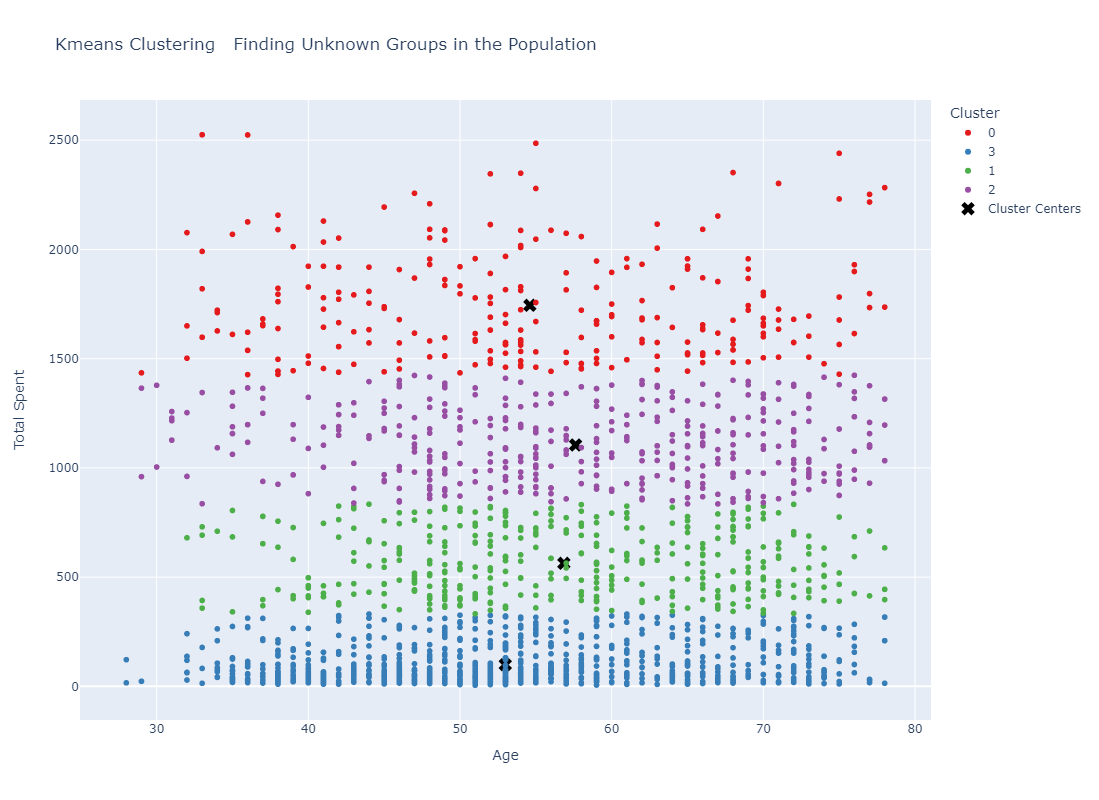

In [92]:
#Using plotly Express
import plotly.graph_objects as go

fig = px.scatter(x=X.values[:,0], y=X.values[:,1], color=kmeans2.labels_.astype(str),  # Convert labels to string
                 color_discrete_sequence=px.colors.qualitative.Set1,  # Use a discrete color sequence
                 title="Kmeans Clustering \n Finding Unknown Groups in the Population",
                 labels={'color': 'Cluster', 'x': 'Age', 'y': 'Total Spent'},
                 width=900, height=800)  

fig.add_trace(go.Scatter(x=kmeans2.cluster_centers_[:,0], y=kmeans2.cluster_centers_[:,1], 
                         mode='markers', marker=dict(color='black', size=12, symbol='x'),
                         name='Cluster Centers'))
fig.show()

In [93]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X, kmeans2.labels_)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.6469976216541858


## Agglomerative Clustering

In [94]:


from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(n_clusters=4)

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = df.sample(frac=.05)

sample_X = sample_df[["Age", "Total_Spent"]]

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(sample_X)
sample_agglomerative_clustering


linked = linkage(sample_agglomerative_clustering.children_, 'single')

In [96]:
sample_agglomerative_clustering.labels_

array([1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 2, 1, 1, 3, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 3, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 3, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 3, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 0],
      dtype=int64)

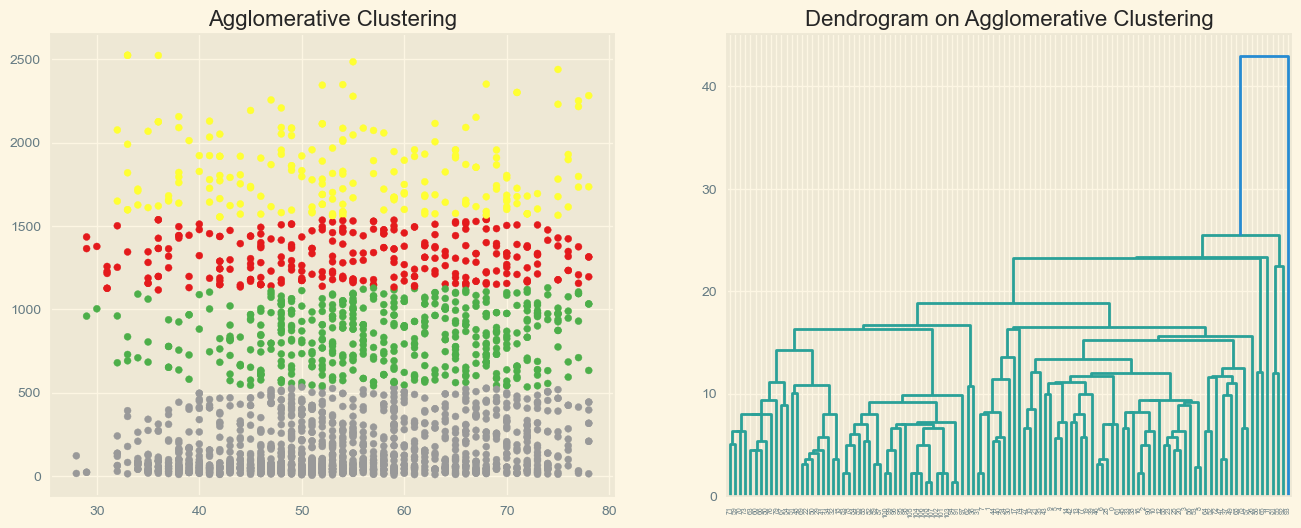

In [97]:
sample_agglomerative_clustering.labels_
plt.style.use("Solarize_Light2")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))

# Scatter plot for Agglomerative Clustering
ax1.scatter(X.values[:,0], X.values[:,1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
ax1.set_title("Agglomerative Clustering", fontsize=16)

# Dendrogram
dendrogram(linked,  
           orientation='top',
           labels=None,  
           #labels=sample_agglomerative_clustering.labels_,
           distance_sort='descending',
           show_leaf_counts=False,
           ax=ax2)

ax2.set_title("Dendrogram on Agglomerative Clustering")

plt.show()

## Applying silhoutee method

In [99]:
from sklearn.metrics import silhouette_score, silhouette_samples

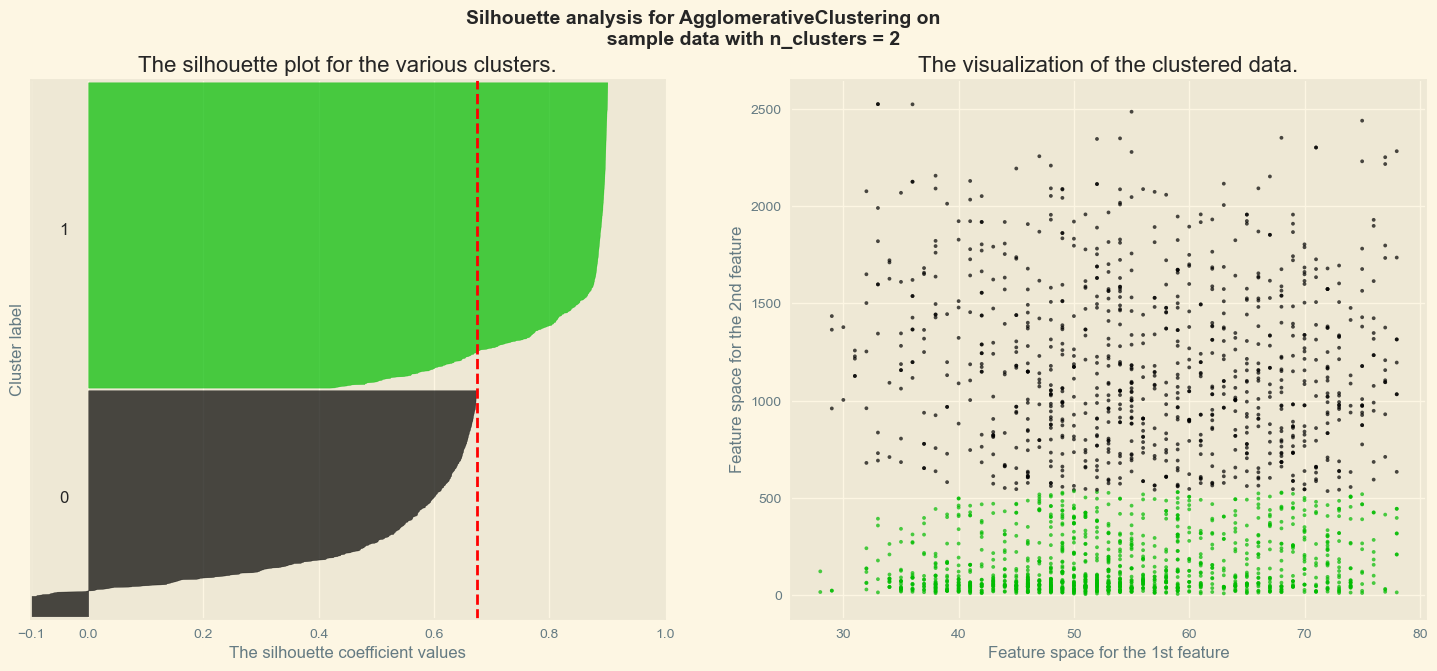

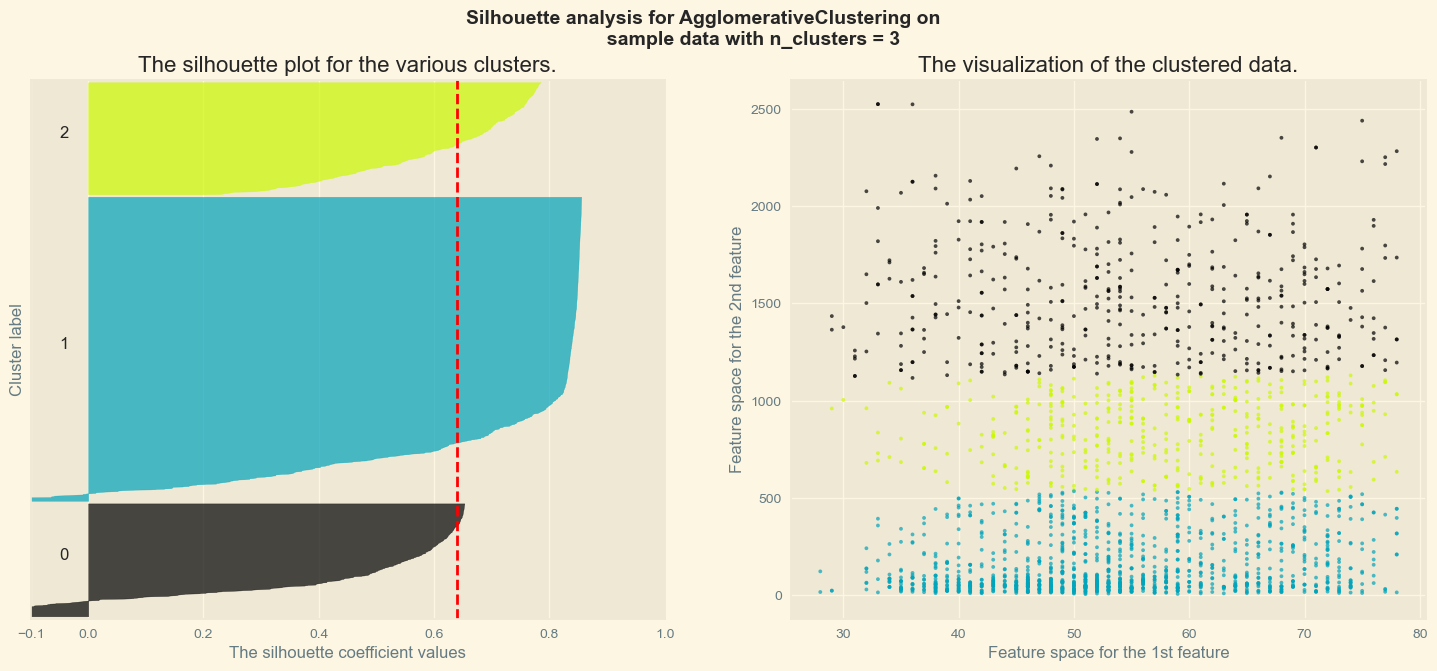

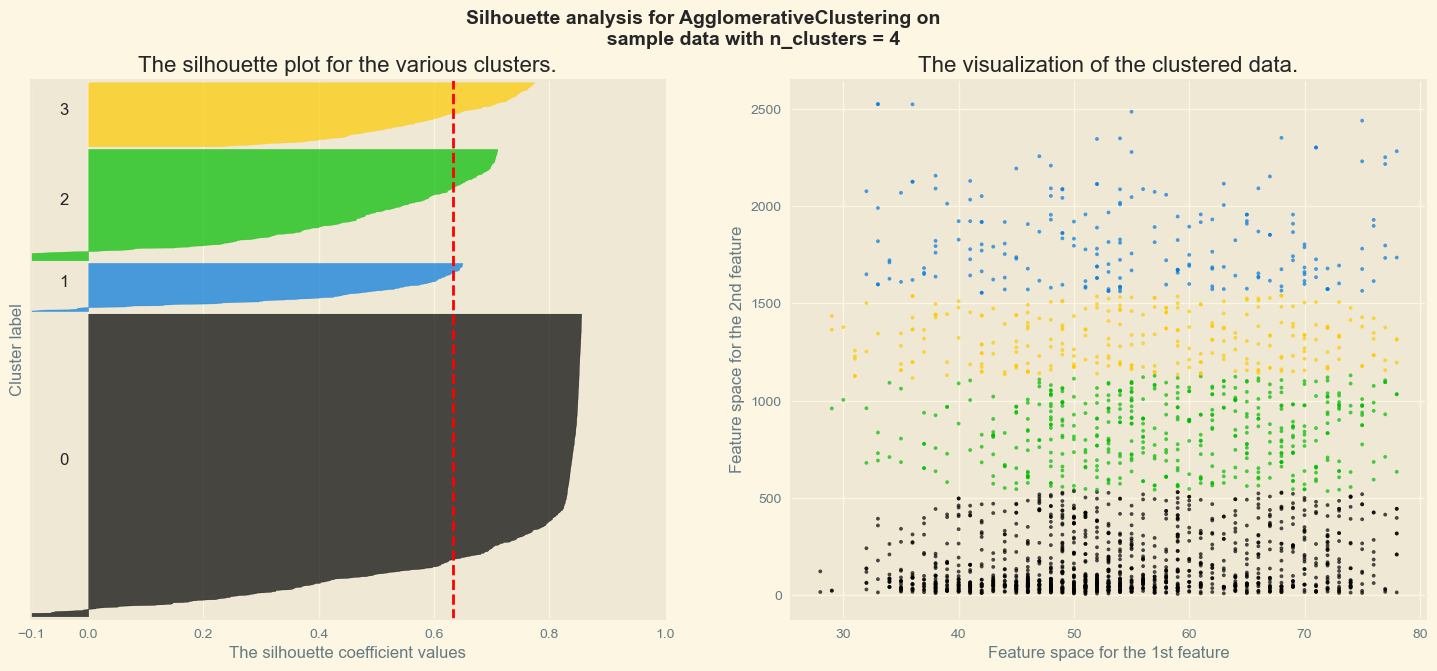

In [108]:
import matplotlib.cm as cm

reduced_possible_k_values = range(2, 5)

for k in reduced_possible_k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], 
                marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle('''Silhouette analysis for AgglomerativeClustering on 
                  sample data with n_clusters = %d'''
                  % k, fontsize=14, fontweight="bold")

plt.show()

In [109]:
# silhouette score
reduced_possible_k_values = range(2, 5)

for k in reduced_possible_k_values:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette score is: 0.6747795196433068
For n_clusters = 3, the average silhouette score is: 0.6400968377159062
For n_clusters = 4, the average silhouette score is: 0.6324121320597069


## DBSCAN Clustering

In [117]:
from sklearn.cluster import DBSCAN
dbscan  = DBSCAN(eps=3, min_samples = 4)


In [118]:
Y = df[["Income", "Total_Spent"]]
model = dbscan.fit(Y)

In [120]:
labels = model.labels_
print("labels")

labels


In [ ]:
print

In [114]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Children', 'Age', 'Total_Spent'],
      dtype='object')